In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

phase_list=["A1","A2","A31","A32","A41","A42","A5","A6","A7"]

mouse=6

phase=phase_list[2]

#for index in range(0,len(Index)):
    
inputXY='ID138464-%s_%s_XY.txt' %(mouse,phase)

dfx = pd.read_table(inputXY,header=0)
    
inputT='ID138464-%s_long_trace_%s.csv'%(mouse,phase)

dfl=pd.read_csv(inputT,header=0)

In [53]:
dfx["session"]=0

ses=dfx.columns.get_loc('session')

for i in range(1,dfx.shape[0]):
    
    if (dfx.iloc[i].loc["FZ"]!=dfx.iloc[i-1].loc["FZ"]):
        
        dfx.iloc[i,ses]= int(dfx.iloc[i-1,ses])+1
    
    else:
        
        dfx.iloc[i,ses]= int(dfx.iloc[i-1,ses])

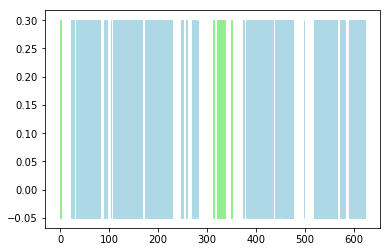

In [54]:
plt.ylim=(-0.05,0.30)

for i in range(0,dfx.shape[0]):
    
    if dfx.iloc[i].loc['FZ'] == 1:
            
        if dfx.iloc[i].loc['X']  <= 125:
                
            if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='lightpink'
                    
            else:
                    
                    Color='lightblue'
            
        else:
                
                if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='silver'
                    
                else:
                    
                    Color='lightgreen'
                
        
        plt.fill([dfx.iloc[i].loc['Slice'],dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']],[-0.05,-0.05,0.30,0.30],color=Color)

plt.show()

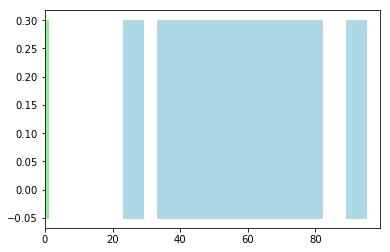

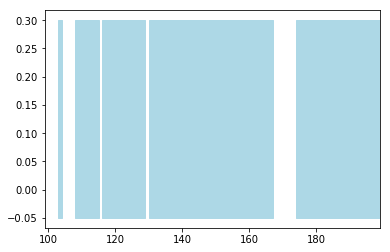

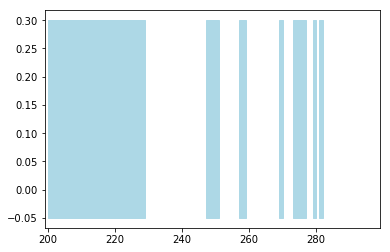

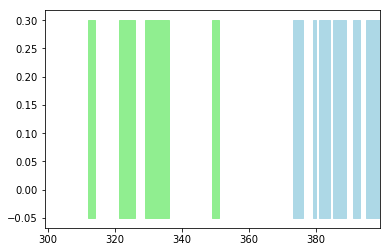

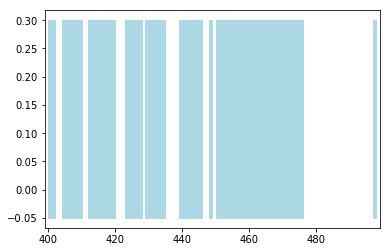

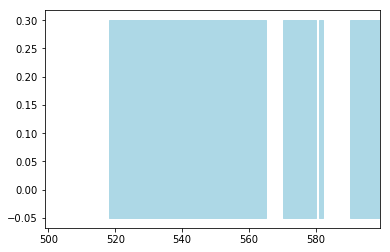

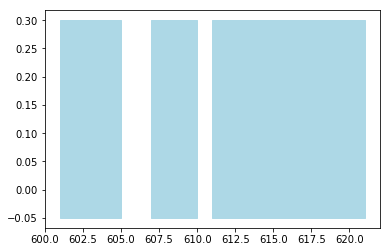

In [55]:
plt.ylim=(-0.05,0.30)

cn =0

xmin = dfx.iloc[0].loc['Slice']

for i in range(0,dfx.shape[0]):
    
    cn +=1
            
    if dfx.iloc[i].loc['FZ'] == 1:
            
        if dfx.iloc[i].loc['X']  <= 125:
                
            if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='lightpink'
                    
            else:
                    
                    Color='lightblue'
            
        else:
                
                if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='silver'
                    
                else:
                    
                    Color='lightgreen'
                
        
        plt.fill([dfx.iloc[i].loc['Slice'],dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']],[-0.05,-0.05,0.30,0.30],color=Color)
        
    if(cn>=100):
            
        xmax=dfx.iloc[i].loc['Slice']
            
        plt.xlim(xmin,xmax)
            
        xmin = dfx.iloc[i].loc['Slice']
            
        plt.show()
            
        cn = 0

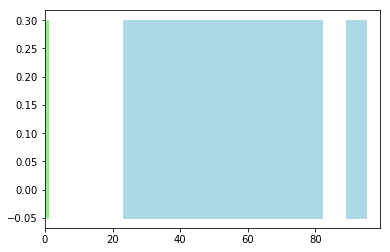

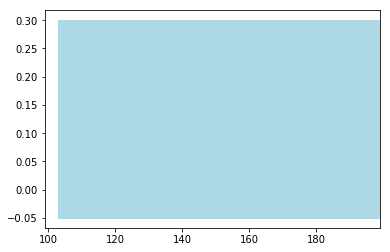

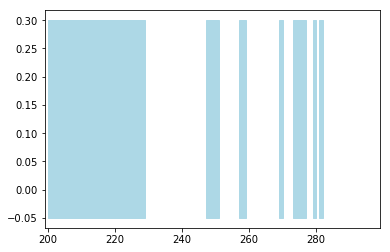

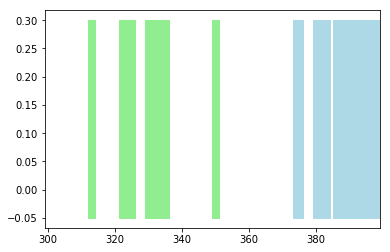

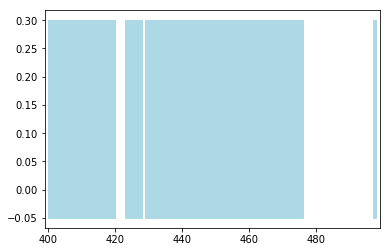

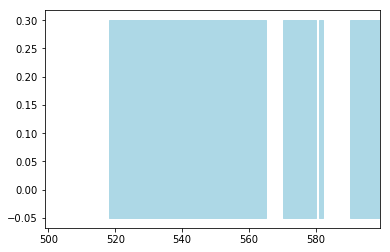

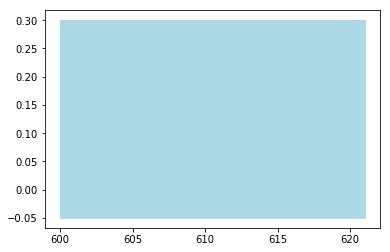

In [56]:
dfx['FZ_c']=dfx['FZ']
dfx['ses_c']=0

ses=dfx.columns.get_loc('session')

ses_c=dfx.columns.get_loc('ses_c')

fzc=dfx.columns.get_loc('FZ_c')

cnt=0

sup=0

r=20

for i in range(1,int(dfx.iloc[dfx.shape[0]-1,ses])+1):
    
    fz=dfx[dfx['session']==i].iloc[0,fzc]
    
    nfz=int((1-fz)*(1-fz))
    
    slice_b=dfx[dfx['session']==i].iloc[0].loc['Slice']
    
    slice_a=dfx[dfx['session']==i].iloc[dfx[dfx['session']==i].shape[0]-1].loc['Slice']
    
    Query='%d<=Slice<%d'%(int(slice_b),int(slice_a+r))
    
    dfx_s=dfx.query(Query)
    
    if(i<int(dfx.iloc[dfx.shape[0]-1,ses])):
    
        p=1.0*dfx_s['FZ'].value_counts()[fz]/(dfx_s.shape[0]*1.0)
        
    else:
        
        p=0
    
    if((dfx[dfx['session']==i].shape[0]<10) and (p<0.350) and (fz==0)):
                
        dfx.loc[dfx['session']==i,'ses_c']=cnt
        
        dfx.loc[dfx['session']==i,'FZ_c']=nfz
        
        sup=1
        
    else:
        
        cnt+=1-sup
        
        dfx.loc[dfx['session']==i,'ses_c']=cnt
        
        dfx.loc[dfx['session']==i,'FZ_c']=fz
        
        sup=0
        


plt.ylim=(-0.05,0.30)

cn =0

xmin = dfx.iloc[0].loc['Slice']

for i in range(0,dfx.shape[0]):
    
    cn +=1
            
    if dfx.iloc[i].loc['FZ_c'] == 1:
            
        if dfx.iloc[i].loc['X']  <= 125:
                
            if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='lightpink'
                    
            else:
                    
                    Color='lightblue'
            
        else:
                
                if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='silver'
                    
                else:
                    
                    Color='lightgreen'
                
        
        plt.fill([dfx.iloc[i].loc['Slice'],dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']],[-0.05,-0.05,0.30,0.30],color=Color)
        
    if(cn>=100):
            
        xmax=dfx.iloc[i].loc['Slice']
            
        plt.xlim(xmin,xmax)
            
        xmin = dfx.iloc[i].loc['Slice']
            
        plt.show()
            
        cn = 0

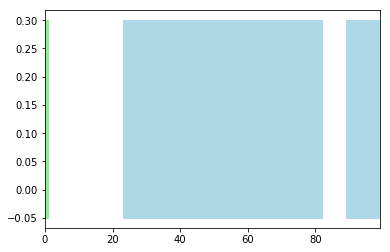

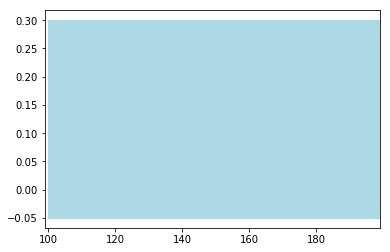

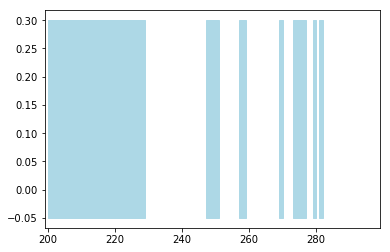

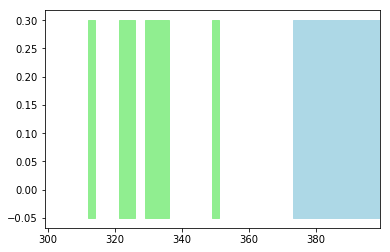

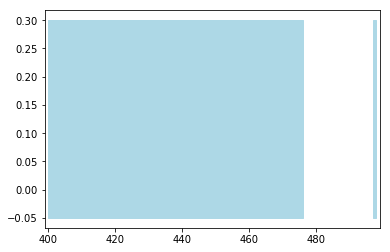

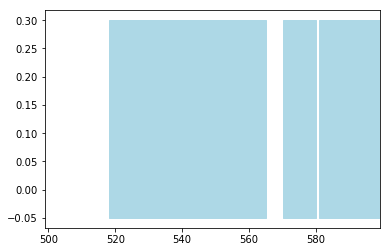

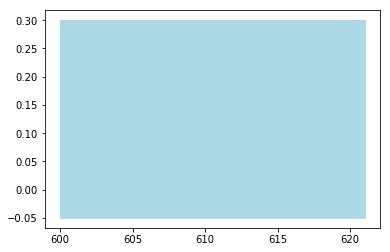

In [57]:
dfx['FZ_c1']=dfx['FZ_c']
dfx['ses_c1']=0

ses_c=dfx.columns.get_loc('ses_c')

ses_c1=dfx.columns.get_loc('ses_c1')

fzc1=dfx.columns.get_loc('FZ_c1')

cnt=0

sup=0

r=20

for i in range(1,int(dfx.iloc[dfx.shape[0]-1,ses_c])+1):
    
    fz=dfx[dfx['ses_c']==i].iloc[0,fzc1]
    
    nfz=int((1-fz)*(1-fz))
    
    slice_b=dfx[dfx['ses_c']==i].iloc[0].loc['Slice']
    
    slice_a=dfx[dfx['ses_c']==i].iloc[dfx[dfx['ses_c']==i].shape[0]-1].loc['Slice']
    
    Query='%d<=Slice<%d'%(int(slice_b),int(slice_a+r))
    
    dfx_s=dfx.query(Query)
    
    if(i<int(dfx.iloc[dfx.shape[0]-1,ses_c])):
    
        p=1.0*dfx_s['FZ_c'].value_counts()[fz]/(dfx_s.shape[0]*1.0)
        
    else:
        
        p=0
    
    if((dfx[dfx['ses_c']==i].shape[0]<10) and (p<0.350) and (fz==0)):
                
        dfx.loc[dfx['ses_c']==i,'ses_c1']=cnt
        
        dfx.loc[dfx['ses_c']==i,'FZ_c1']=nfz
        
        sup=1
        
    else:
        
        cnt+=1-sup
        
        dfx.loc[dfx['ses_c']==i,'ses_c1']=cnt
        
        sup=0

plt.ylim=(-0.05,0.30)

cn =0

xmin = dfx.iloc[0].loc['Slice']

for i in range(0,dfx.shape[0]):
    
    cn +=1
            
    if dfx.iloc[i].loc['FZ_c1'] == 1:
            
        if dfx.iloc[i].loc['X']  <= 125:
                
            if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='lightpink'
                    
            else:
                    
                    Color='lightblue'
            
        else:
                
                if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='silver'
                    
                else:
                    
                    Color='lightgreen'
                
        
        plt.fill([dfx.iloc[i].loc['Slice'],dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']],[-0.05,-0.05,0.30,0.30],color=Color)
        
    if(cn>=100):
            
        xmax=dfx.iloc[i].loc['Slice']
            
        plt.xlim(xmin,xmax)
            
        xmin = dfx.iloc[i].loc['Slice']
            
        plt.show()
            
        cn = 0
        
    #title_name='%s/slice/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
    #plt.title(title_name)
    #file_name=title_name+'.png'
    #plt.savefig(file_name)
    #plt.figure()

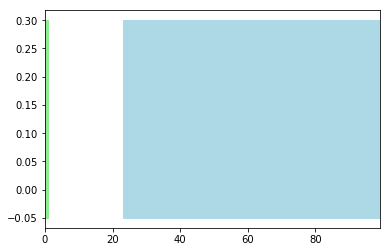

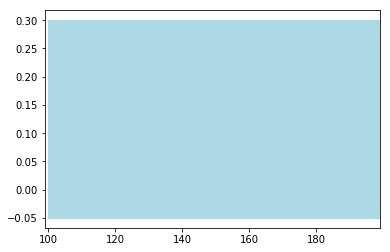

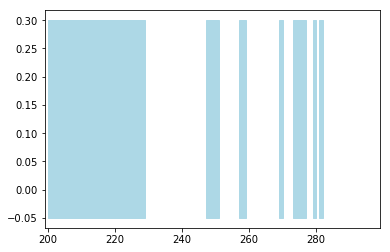

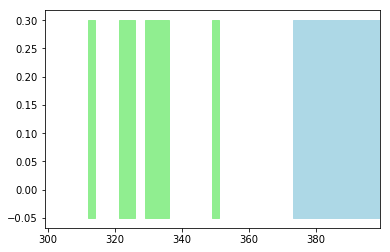

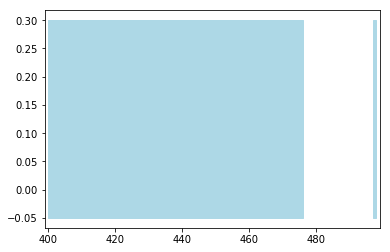

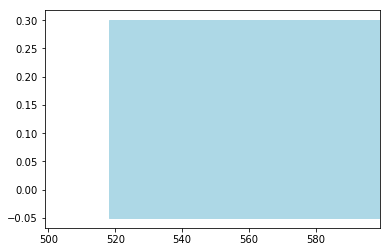

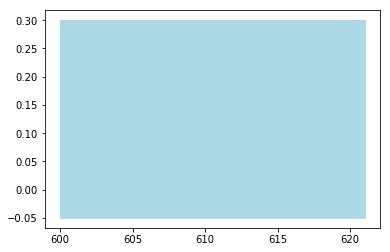

In [58]:
dfx['FZ_c2']=dfx['FZ_c1']
dfx['ses_c2']=0

ses_c1=dfx.columns.get_loc('ses_c1')

ses_c2=dfx.columns.get_loc('ses_c2')

fzc2=dfx.columns.get_loc('FZ_c2')

cnt=0

sup=0

r=20

for i in range(1,int(dfx.iloc[dfx.shape[0]-1,ses_c1])+1):
    
    fz=dfx[dfx['ses_c1']==i].iloc[0,fzc2]
    
    nfz=int((1-fz)*(1-fz))
    
    slice_b=dfx[dfx['ses_c1']==i].iloc[0].loc['Slice']
    
    slice_a=dfx[dfx['ses_c1']==i].iloc[dfx[dfx['ses_c1']==i].shape[0]-1].loc['Slice']
    
    Query='%d<=Slice<%d'%(int(slice_b),int(slice_a+r))
    
    dfx_s=dfx.query(Query)
    
    if(i<int(dfx.iloc[dfx.shape[0]-1,ses_c1])):
    
        p=1.0*dfx_s['FZ_c1'].value_counts()[fz]/(dfx_s.shape[0]*1.0)
        
    else:
        
        p=0
    
    if((dfx[dfx['ses_c1']==i].shape[0]<10) and (p<0.350) and (fz==0)):
                
        dfx.loc[dfx['ses_c1']==i,'ses_c2']=cnt
        
        dfx.loc[dfx['ses_c1']==i,'FZ_c2']=nfz
        
        sup=1
        
    else:
        
        cnt+=1-sup
        
        dfx.loc[dfx['ses_c1']==i,'ses_c2']=cnt
        
        sup=0

plt.ylim=(-0.05,0.30)

cn =0

xmin = dfx.iloc[0].loc['Slice']

for i in range(0,dfx.shape[0]):
    
    cn +=1
            
    if dfx.iloc[i].loc['FZ_c2'] == 1:
            
        if dfx.iloc[i].loc['X']  <= 125:
                
            if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='lightpink'
                    
            else:
                    
                    Color='lightblue'
            
        else:
                
                if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='silver'
                    
                else:
                    
                    Color='lightgreen'
                
        
        plt.fill([dfx.iloc[i].loc['Slice'],dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']],[-0.05,-0.05,0.30,0.30],color=Color)
        
    if(cn>=100):
            
        xmax=dfx.iloc[i].loc['Slice']
            
        plt.xlim(xmin,xmax)
            
        xmin = dfx.iloc[i].loc['Slice']
            
        plt.show()
            
        cn = 0
        
    #title_name='%s/slice/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
    #plt.title(title_name)
    #file_name=title_name+'.png'
    #plt.savefig(file_name)
    #plt.figure()

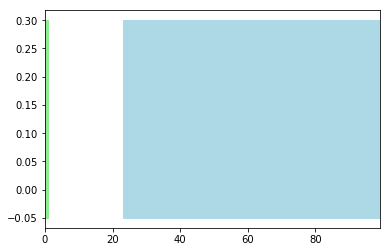

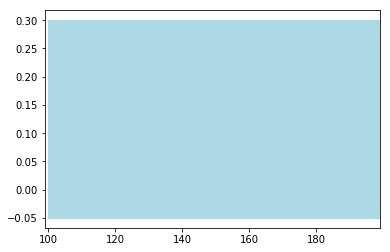

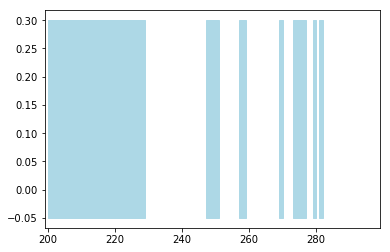

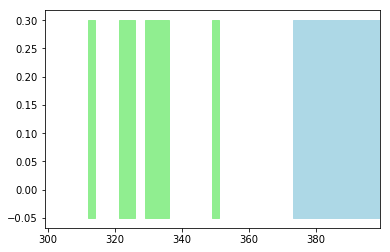

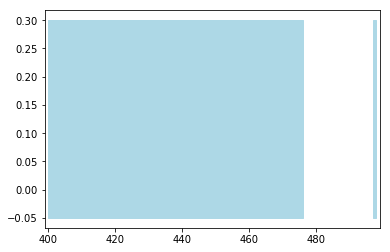

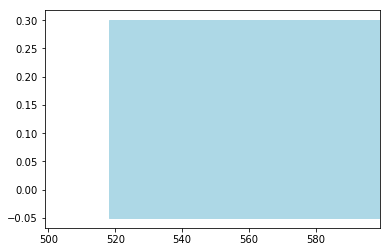

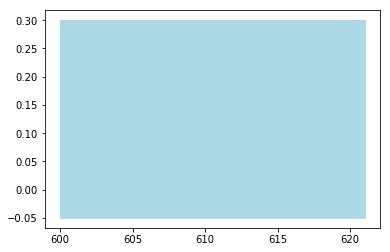

In [59]:
dfx['FZ_c3']=dfx['FZ_c2']
dfx['ses_c3']=0

ses_c2=dfx.columns.get_loc('ses_c2')

ses_c3=dfx.columns.get_loc('ses_c3')

fzc3=dfx.columns.get_loc('FZ_c3')

cnt=0

sup=0

r=20

for i in range(1,int(dfx.iloc[dfx.shape[0]-1,ses_c2])+1):
    
    fz=dfx[dfx['ses_c2']==i].iloc[0,fzc3]
    
    nfz=int((1-fz)*(1-fz))
    
    slice_b=dfx[dfx['ses_c2']==i].iloc[0].loc['Slice']
    
    slice_a=dfx[dfx['ses_c2']==i].iloc[dfx[dfx['ses_c2']==i].shape[0]-1].loc['Slice']
    
    Query='%d<=Slice<%d'%(int(slice_b),int(slice_a+r))
    
    dfx_s=dfx.query(Query)
    
    if(i<int(dfx.iloc[dfx.shape[0]-1,ses_c2])):
    
        p=1.0*dfx_s['FZ_c2'].value_counts()[fz]/(dfx_s.shape[0]*1.0)
        
    else:
        
        p=0
    
    if((dfx[dfx['ses_c2']==i].shape[0]<10) and (p<0.350) and (fz==0)):
                
        dfx.loc[dfx['ses_c2']==i,'ses_c3']=cnt
        
        dfx.loc[dfx['ses_c2']==i,'FZ_c3']=nfz
        
        sup=1
        
    else:
        
        cnt+=1-sup
        
        dfx.loc[dfx['ses_c2']==i,'ses_c3']=cnt
        
        sup=0

plt.ylim=(-0.05,0.30)

cn =0

xmin = dfx.iloc[0].loc['Slice']

for i in range(0,dfx.shape[0]):
    
    cn +=1
            
    if dfx.iloc[i].loc['FZ_c3'] == 1:
            
        if dfx.iloc[i].loc['X']  <= 125:
                
            if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='lightpink'
                    
            else:
                    
                    Color='lightblue'
            
        else:
                
                if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='silver'
                    
                else:
                    
                    Color='lightgreen'
                
        
        plt.fill([dfx.iloc[i].loc['Slice'],dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']],[-0.05,-0.05,0.30,0.30],color=Color)
        
    if(cn>=100):
            
        xmax=dfx.iloc[i].loc['Slice']
            
        plt.xlim(xmin,xmax)
            
        xmin = dfx.iloc[i].loc['Slice']
            
        plt.show()
            
        cn = 0
        
    #title_name='%s/slice/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
    #plt.title(title_name)
    #file_name=title_name+'.png'
    #plt.savefig(file_name)
    #plt.figure()

In [60]:
dfx

Slice    X    Y  AREA   XOR  FZ  conseqFZ  Distance  Tone  Shock  Light  \
0        0  171  116  1737     0   1         0       0.0     0      0      0   
1        1  170  121  1792   446   0         0       0.6     1      0      0   
2        2  160  126  1635   652   0         0       1.3     1      0      0   
3        3  146  135  1535  1040   0         0       1.9     1      0      0   
4        4  137  170  1484  1780   0         0       4.4     1      0      0   
5        5  138  169  1425   296   0         0       0.2     1      0      0   
6        6  133  168  1526   327   0         0       0.5     1      0      0   
7        7  121  167  1551   379   0         0       1.3     1      0      0   
8        8  120  165  1575    47   0         0       0.3     1      0      0   
9        9  117  163  1645   229   0         0       0.4     1      0      0   
10      10  110  159  1728   308   0         0       1.0     1      0      0   
11      11   84  153  1629   937   0         0       3.0     1      0      0   
12      12   50  131  1619  1608   0         0       4.7     1      0      0   
13      13   56  133  1488   355   0         0       0.8     1      0      0   
14      14   52  129  1226   258   0         0       0.7     1      0      0   
15      15   60  130   724   481   0         0       0.9     1      0      0   
16      16   51  120  1323  1023   0         0       1.6     1      0      0   
17      17   58  127  1376   419   0         0       1.1     1      0      0   
18      18   55  125  1343   190   0         0       0.5     1      0      0   
19      19   54  138  1450   679   0         0       1.7     1      0      0   
20      20   48  166  1308  1173   0         0       3.5     1      0      0   
21      21   44  165  1129   298   0         0       0.4     1      0      0   
22      22   44  161  1157   213   0         0       0.5     1      0      0   
23      23   44  161  1175     0   1         1       0.0     1      0      0   
24      24   45  161  1169     0   1         2       0.1     1      0      0   
25      25   44  161  1169     0   1         3       0.0     1      0      0   
26      26   44  161  1170     0   1         4       0.0     1      0      0   
27      27   44  161  1176     0   1         5       0.0     1      0      0   
28      28   44  161  1168     0   1         6       0.0     1      0      0   
29      29   47  163  1126   275   0         0       0.4     1      0      0   
..     ...  ...  ...   ...   ...  ..       ...       ...   ...    ...    ...   
591    591   40  179  1198    11   1         2       0.1     1      0      0   
592    592   40  179  1218     0   1         3       0.0     1      0      0   
593    593   40  179  1187     0   1         4       0.1     1      0      0   
594    594   39  179  1194     0   1         5       0.0     1      0      0   
595    595   40  179  1194     0   1         6       0.0     1      0      0   
596    596   39  179  1208     1   1         7       0.0     1      0      0   
597    597   40  179  1197     2   1         8       0.0     1      0      0   
598    598   40  179  1185     0   1         9       0.0     1      0      0   
599    599   39  179  1182     1   1        10       0.0     1      0      0   
600    600   39  179  1208    44   0         0       0.1     1      0      0   
601    601   39  178  1205     0   1         1       0.1     1      0      0   
602    602   39  178  1171     7   1         2       0.1     1      0      0   
603    603   39  178  1159     1   1         3       0.0     1      0      0   
604    604   39  178  1162     0   1         4       0.0     1      0      0   
605    605   39  178  1149    77   0         0       0.1     1      0      0   
606    606   39  180  1179    75   0         0       0.2     1      0      0   
607    607   39  180  1178     0   1         1       0.1     1      0      0   
608    608   39  181  1194     0   1         2       0.0     1      0      0   
609  

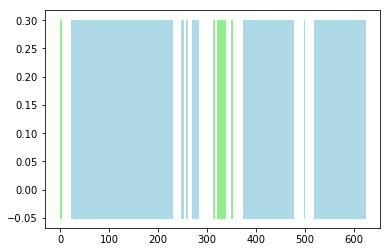

In [61]:
plt.ylim=(-0.05,0.30)

for i in range(0,dfx.shape[0]):
    
    cn +=1
            
    if dfx.iloc[i].loc['FZ_c3'] == 1:
            
        if dfx.iloc[i].loc['X']  <= 125:
                
            if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='lightpink'
                    
            else:
                    
                    Color='lightblue'
            
        else:
                
                if dfx.iloc[i].loc['Y']  <=100:
                    
                    Color='silver'
                    
                else:
                    
                    Color='lightgreen'
                
        
        plt.fill([dfx.iloc[i].loc['Slice'],dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']+1,dfx.iloc[i].loc['Slice']],[-0.05,-0.05,0.30,0.30],color=Color)
        
plt.show()
            
       
        
    #title_name='%s/slice/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
    #plt.title(title_name)
    #file_name=title_name+'.png'
    #plt.savefig(file_name)
    #plt.figure()
    

In [23]:
dfx_m=pd.DataFrame(columns=dfx.columns,index=np.arange(0,int(dfx.iloc[dfx.shape[0]-1].loc['Slice']-1)*10))

In [24]:
dfx_m

Slice    X    Y AREA  XOR   FZ conseqFZ Distance Tone Shock Light  \
0       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
1       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
2       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
3       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
4       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
5       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
6       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
7       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
8       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
9       NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
11      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
12      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
13      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
14      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
15      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
16      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
17      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
18      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
19      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
20      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
21      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
22      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
23      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
24      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
25      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
26      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
27      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
28      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
29      NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
...     ...  ...  ...  ...  ...  ...      ...      ...  ...   ...   ...   
10360   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10361   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10362   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10363   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10364   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10365   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10366   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10367   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10368   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10369   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10370   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10371   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10372   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10373   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10374   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10375   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10376   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10377   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10378   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10379   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10380   NaN  NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   NaN   NaN   
10381   NaN  NaN  NaN  NaN  NaN

In [25]:
for i in range(2,int(dfx.iloc[dfx.shape[0]-1].loc['Slice'])+1):
    
    for j in range(0,10):
        
        for k in range(0,len(dfx_m.columns)):
        
            dfx_m.iloc[(i-2)*10+j].loc[dfx_m.columns[k]]=dfx.iloc[i].loc[dfx_m.columns[k]]

In [37]:
df=pd.concat([dfx_m, dfl], axis=1)
df.columns

Index(['Slice', 'X', 'Y', 'AREA', 'XOR', 'FZ', 'conseqFZ', 'Distance', 'Tone',
       'Shock',
       ...
       ' C250', ' C252', ' C253', ' C254', ' C255', ' C256', ' C257', ' C258',
       ' C260', ' C261'],
      dtype='object', length=250)

/Users/kanri/anaconda/envs/jupyter-env/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/kanri/anaconda/envs/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/kanri/anaconda/envs/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


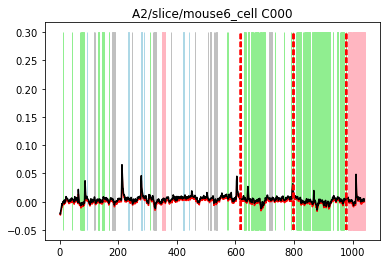

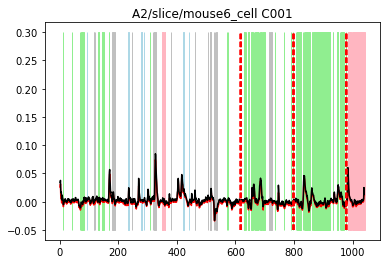

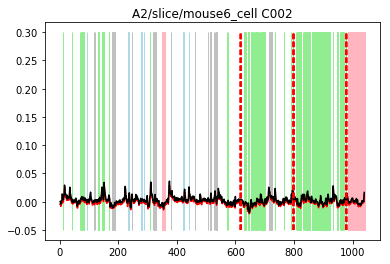

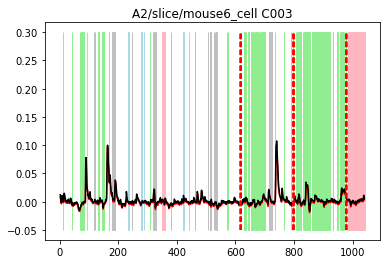

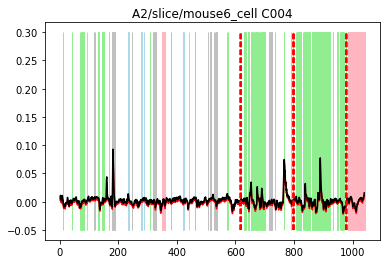

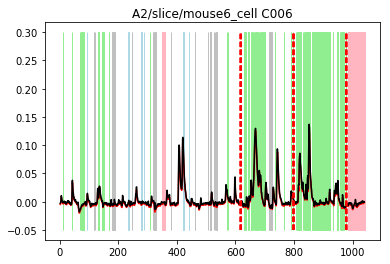

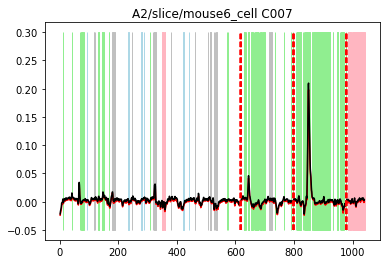

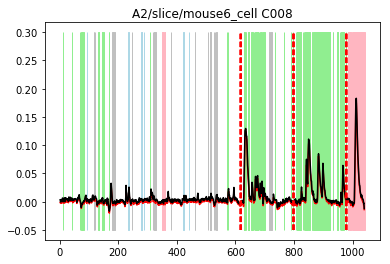

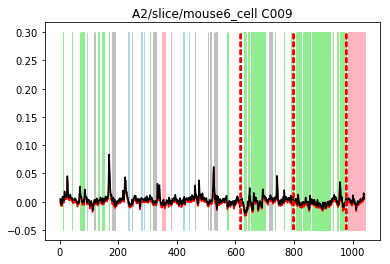

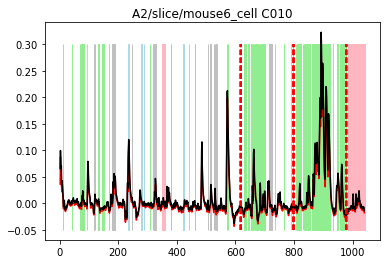

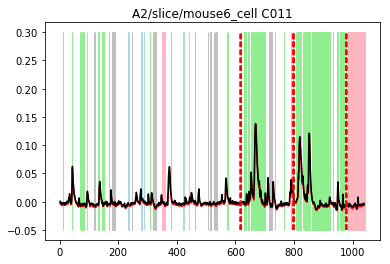

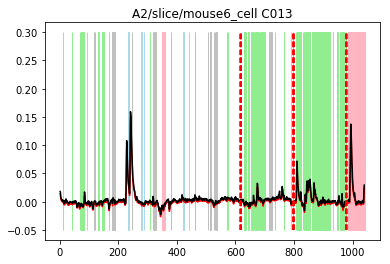

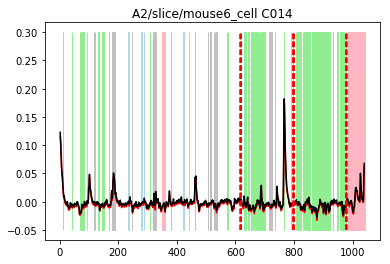

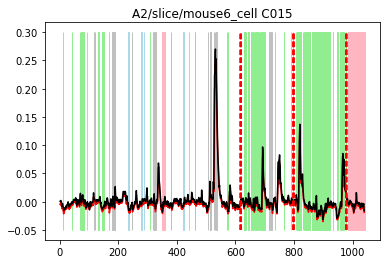

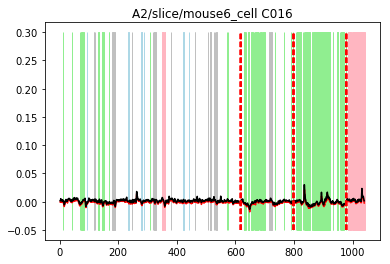

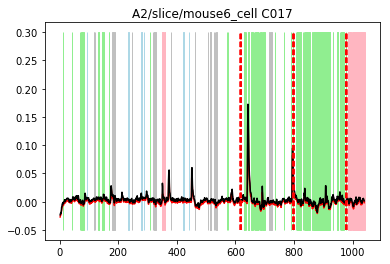

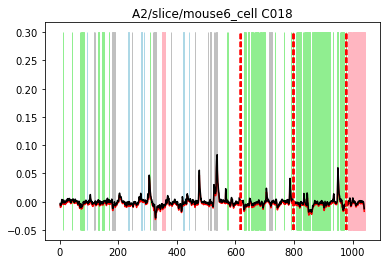

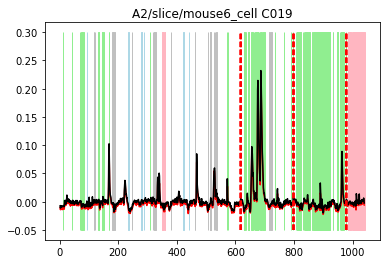

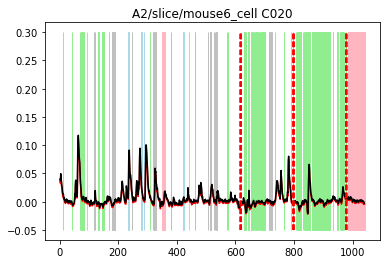

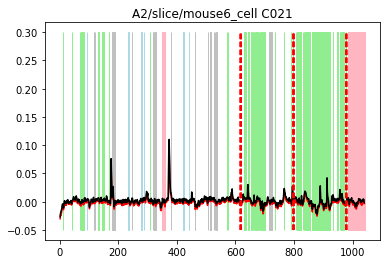

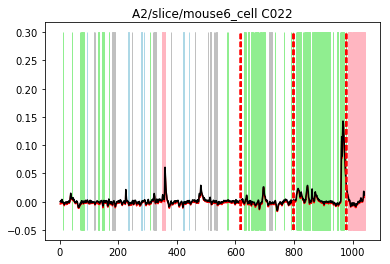

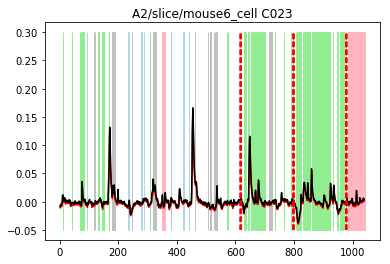

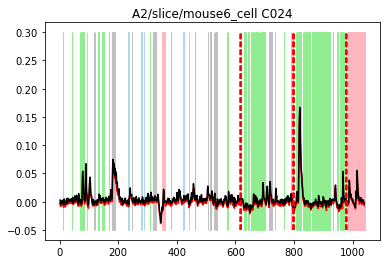

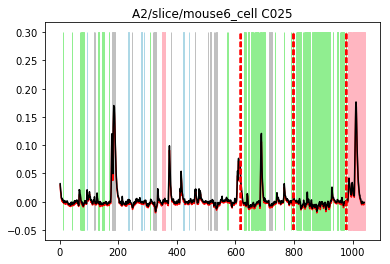

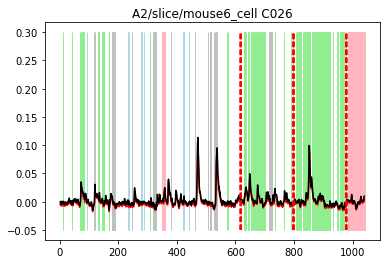

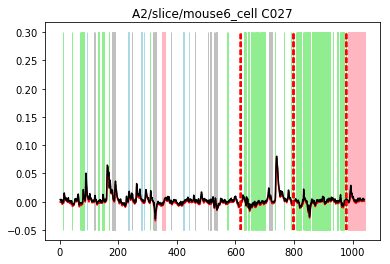

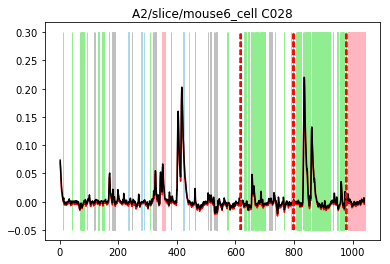

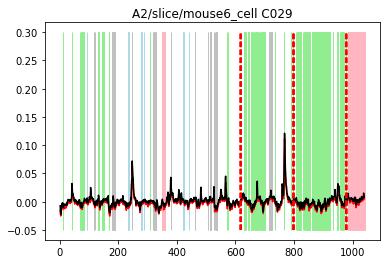

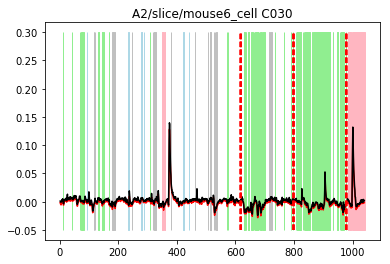

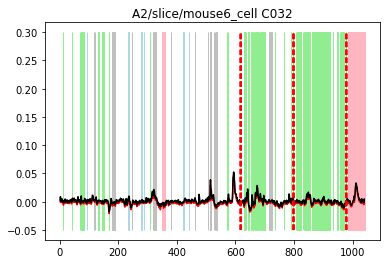

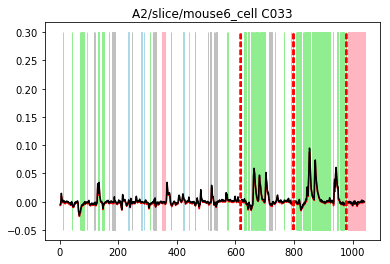

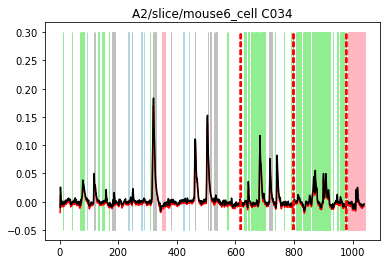

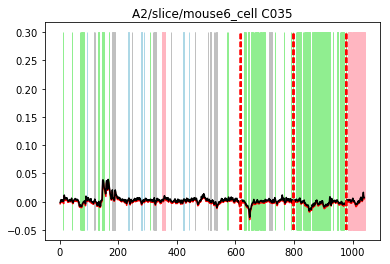

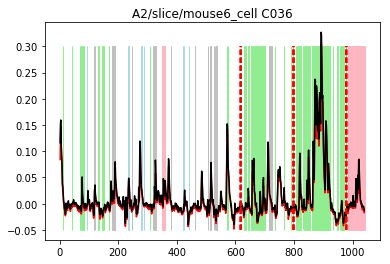

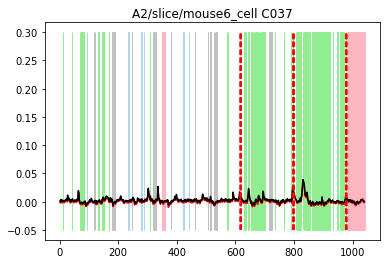

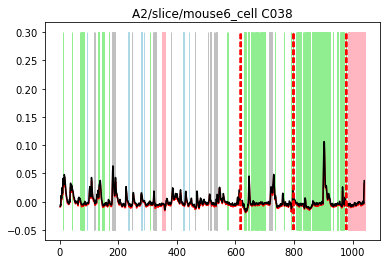

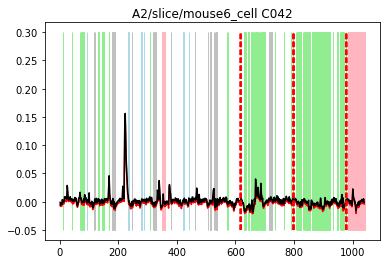

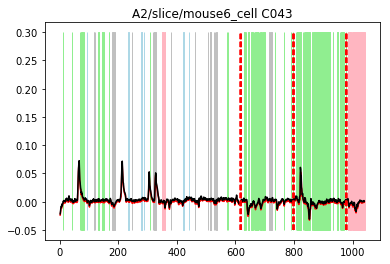

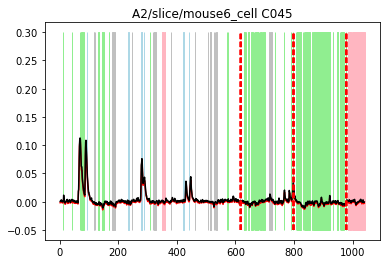

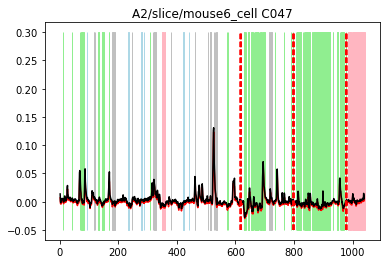

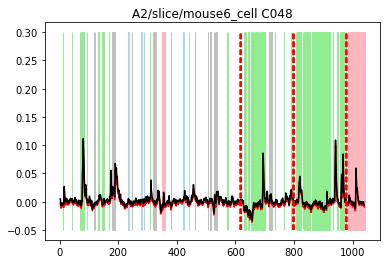

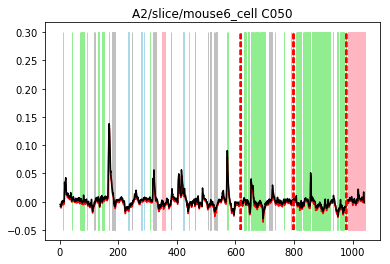

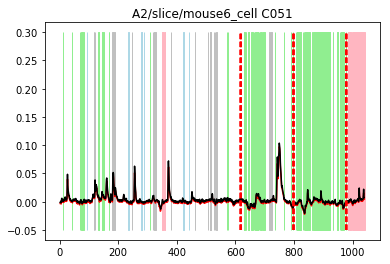

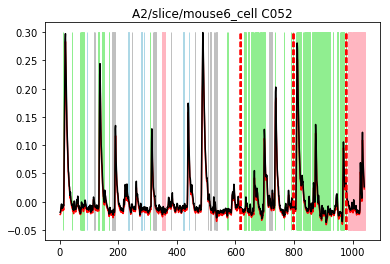

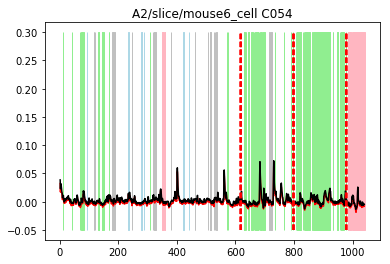

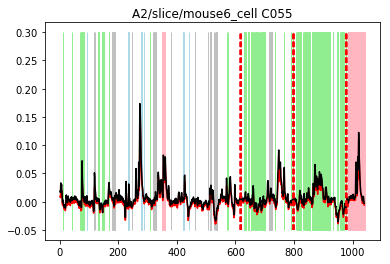

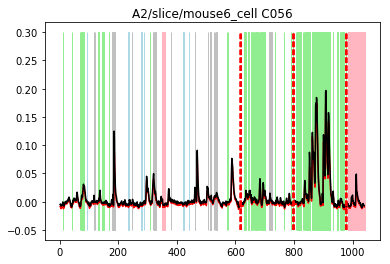

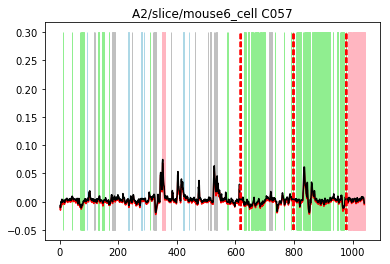

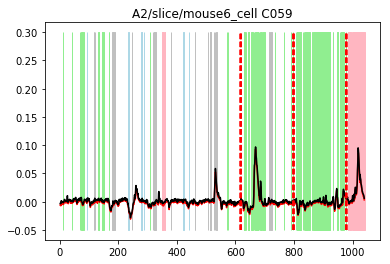

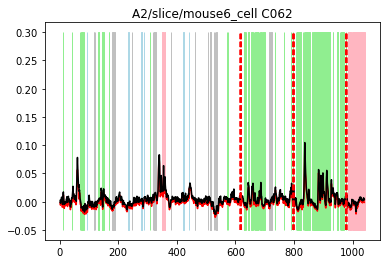

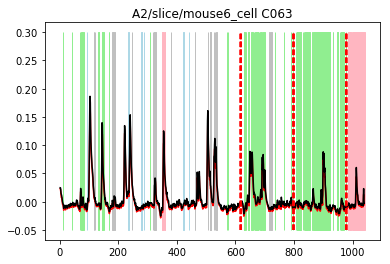

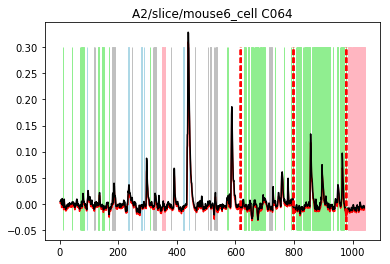

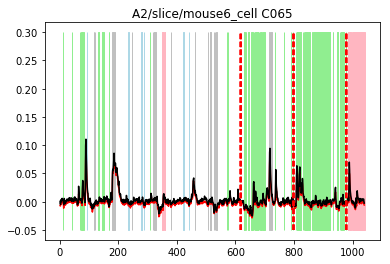

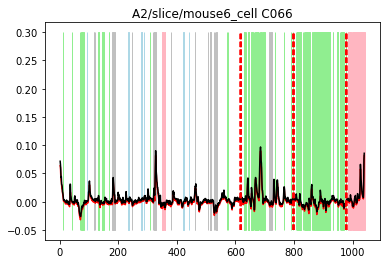

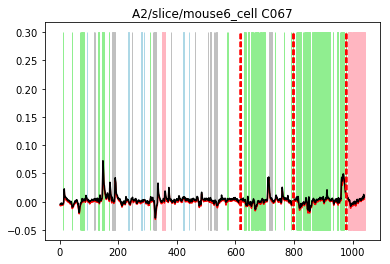

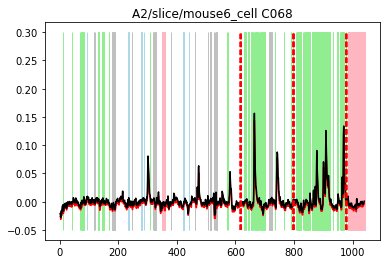

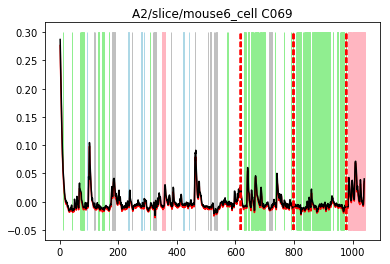

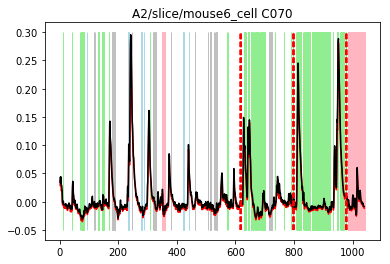

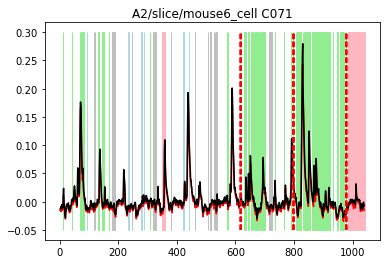

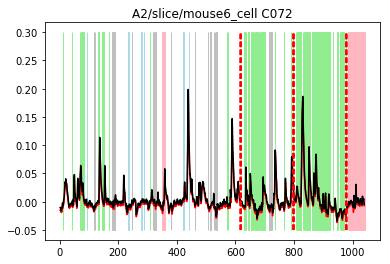

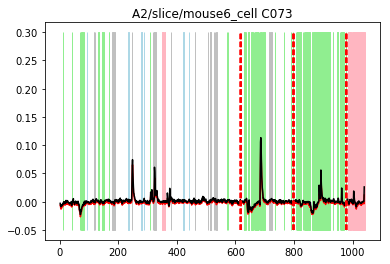

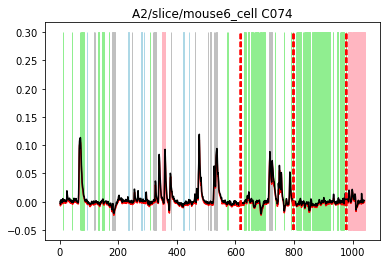

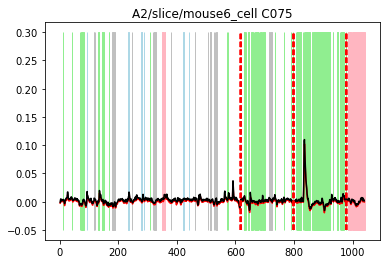

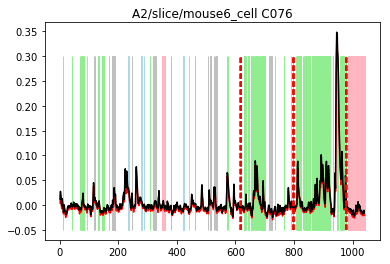

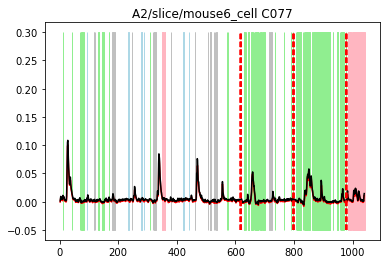

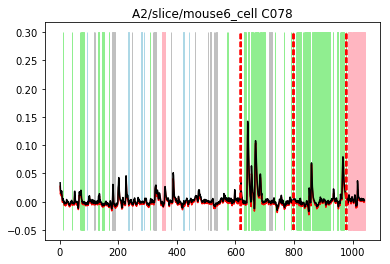

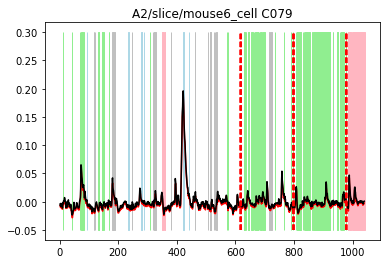

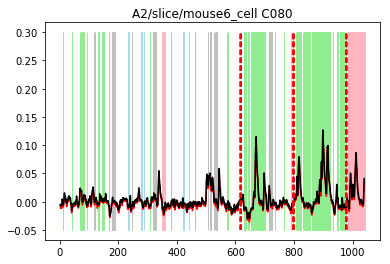

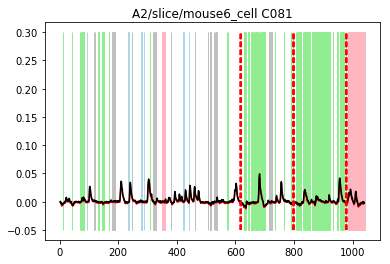

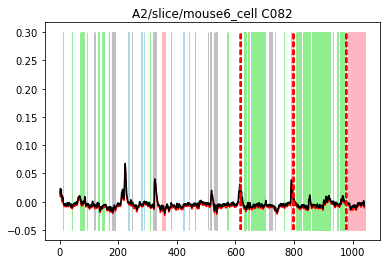

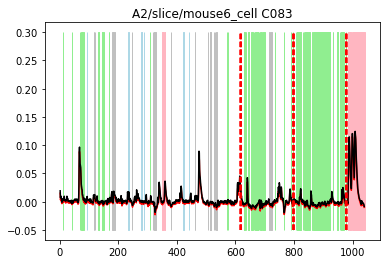

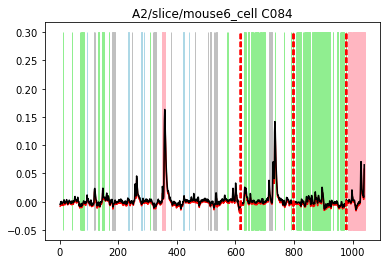

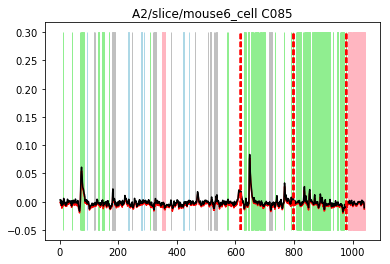

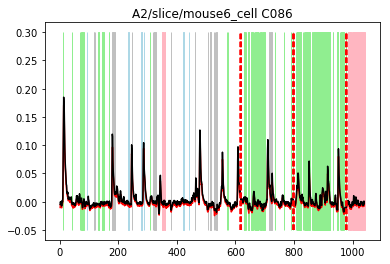

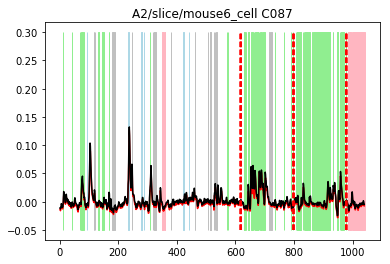

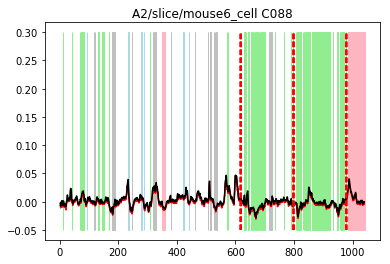

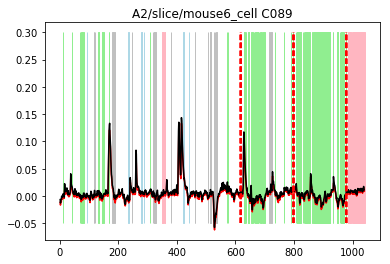

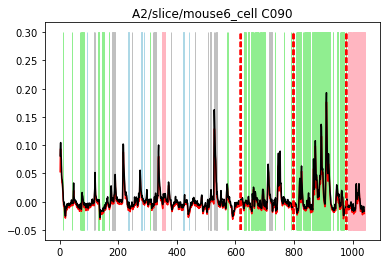

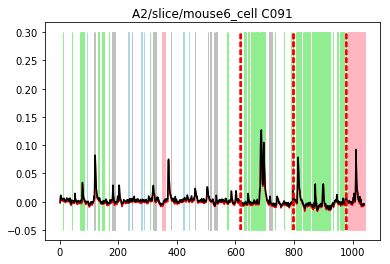

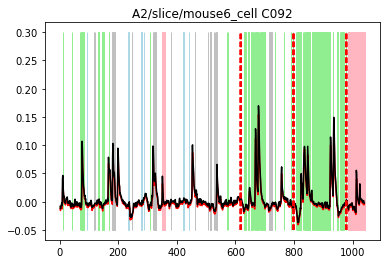

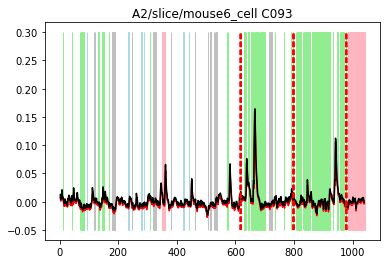

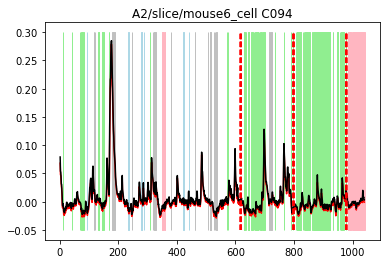

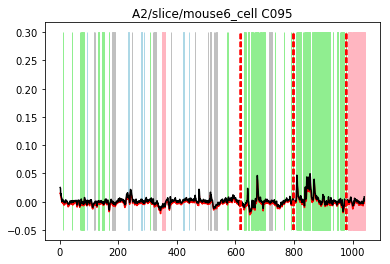

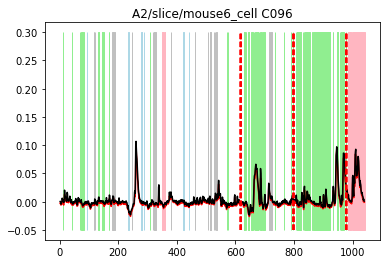

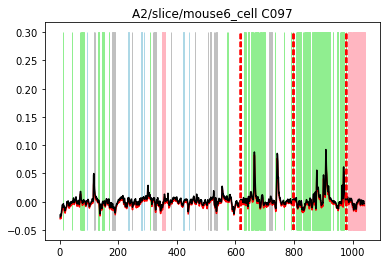

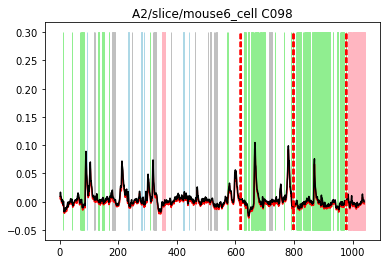

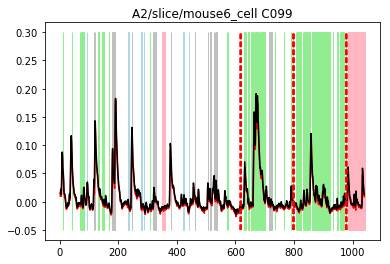

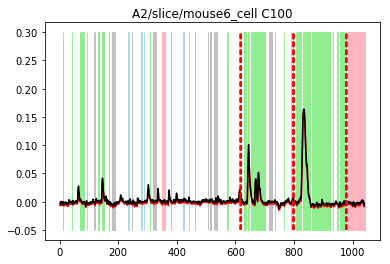

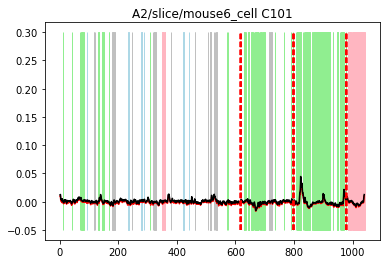

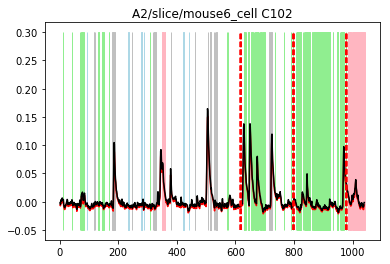

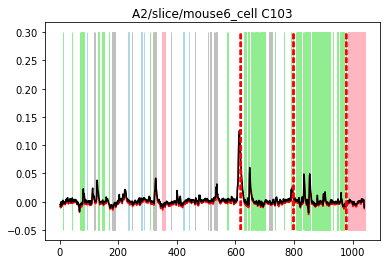

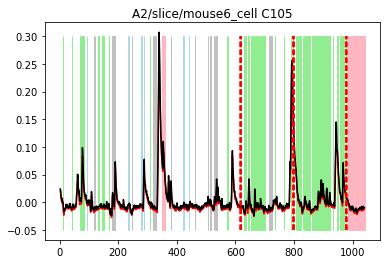

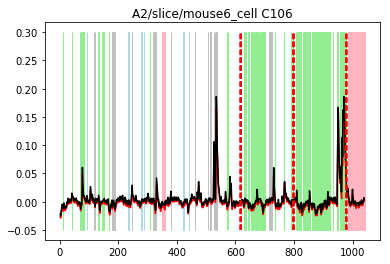

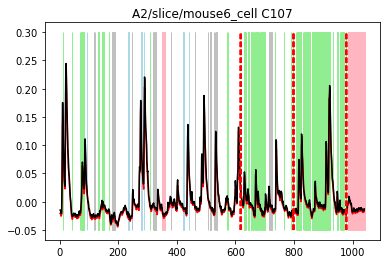

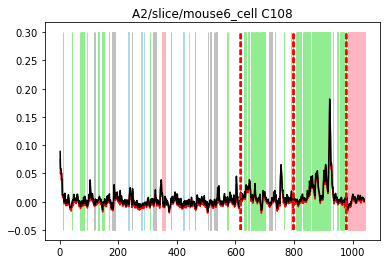

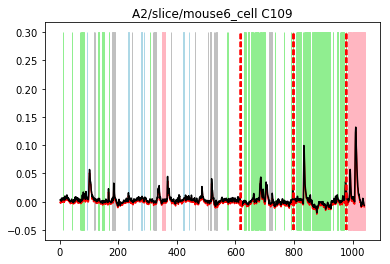

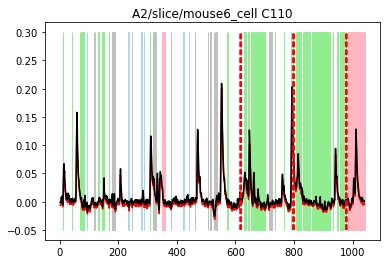

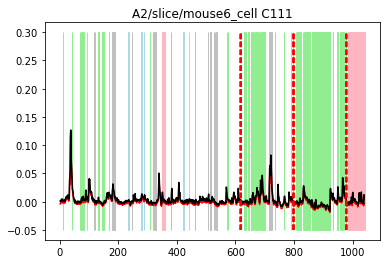

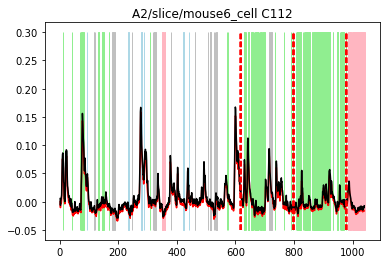

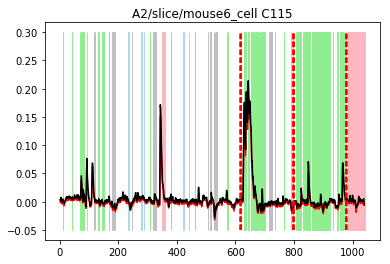

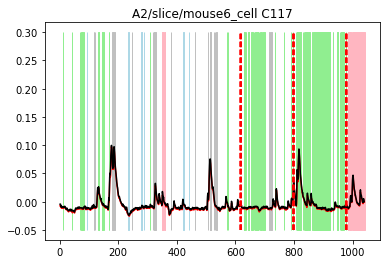

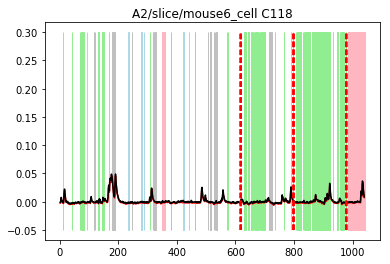

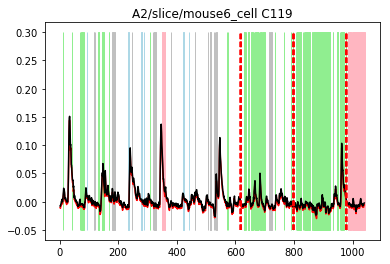

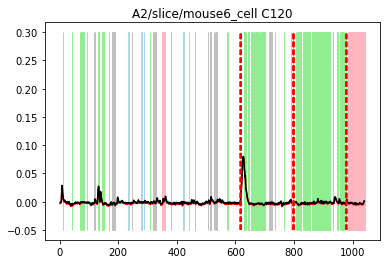

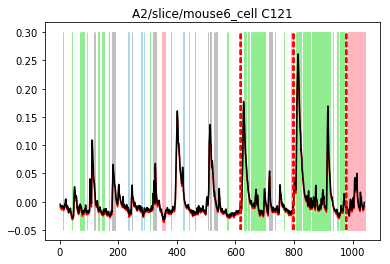

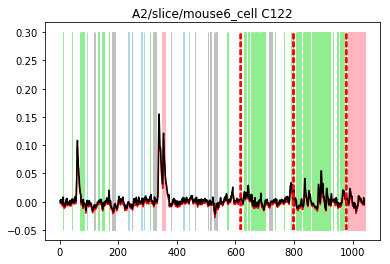

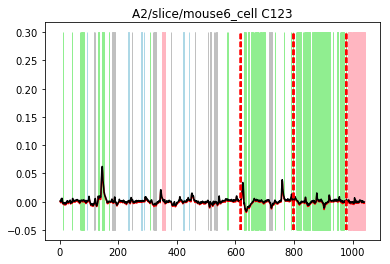

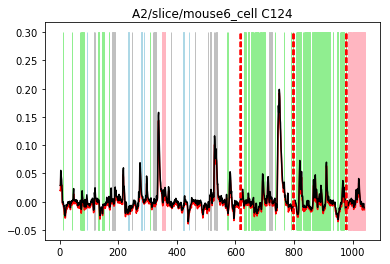

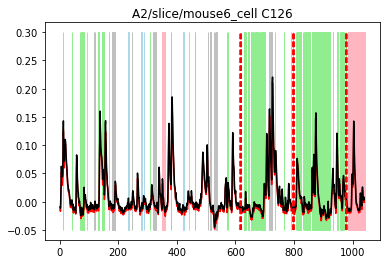

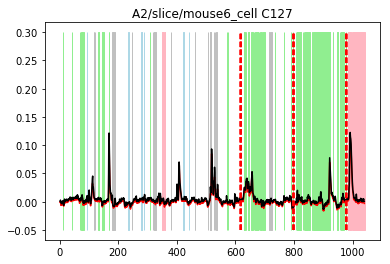

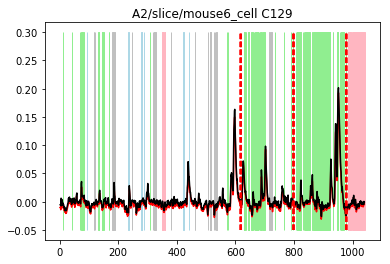

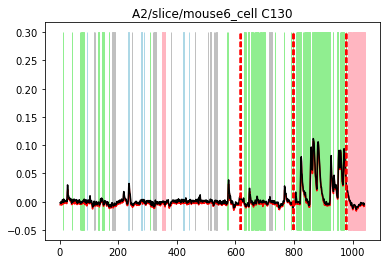

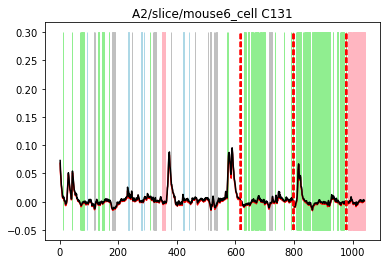

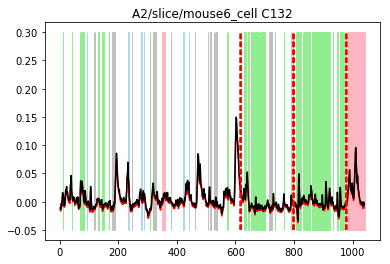

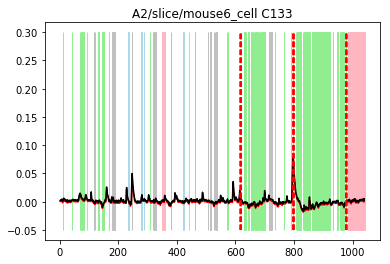

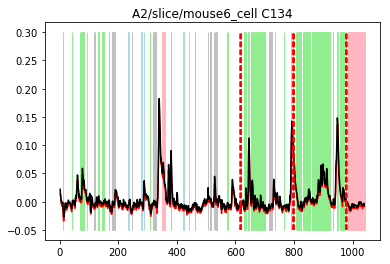

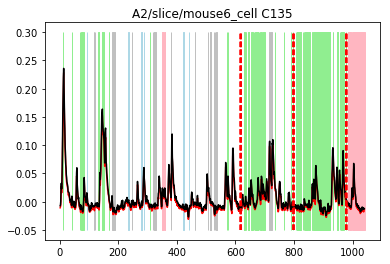

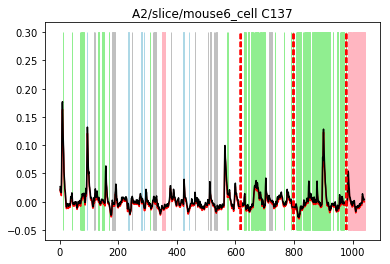

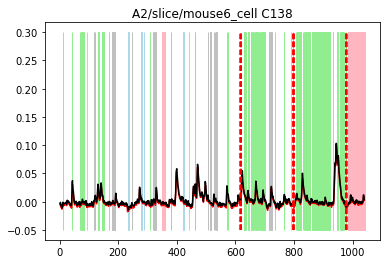

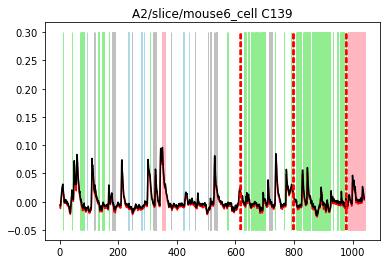

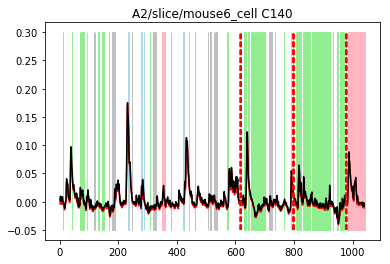

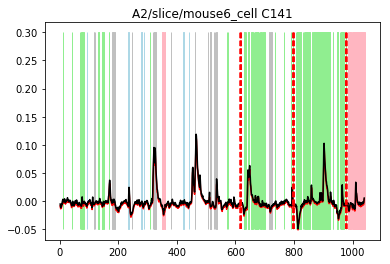

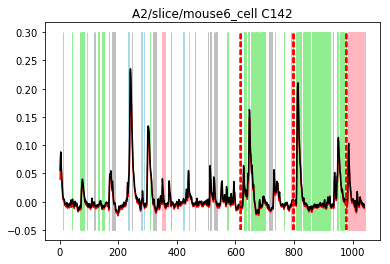

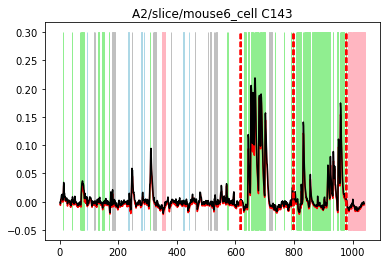

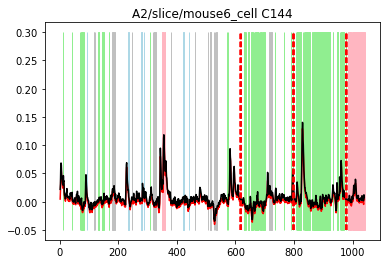

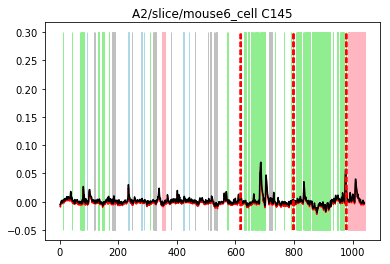

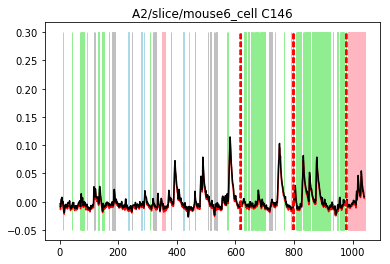

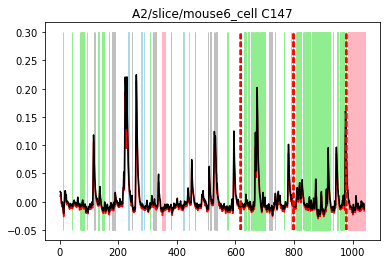

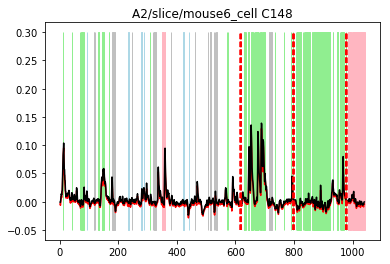

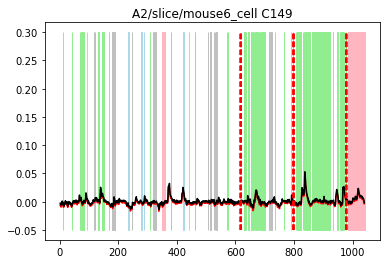

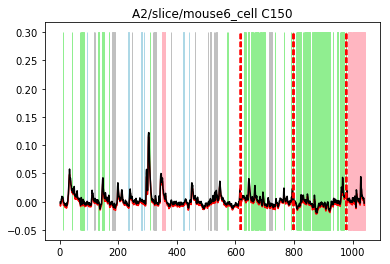

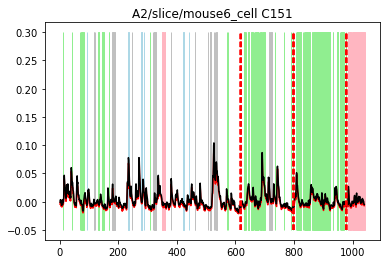

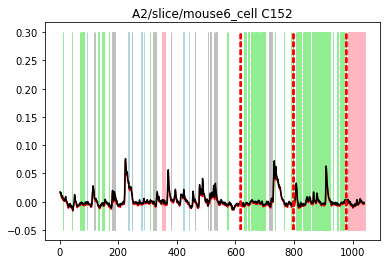

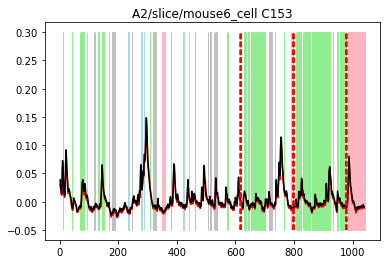

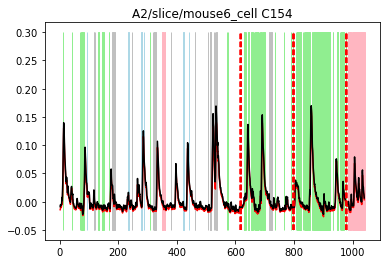

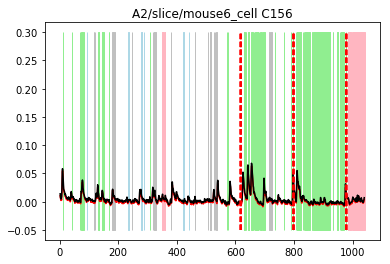

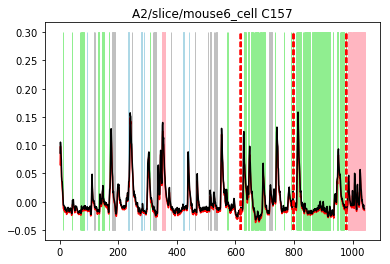

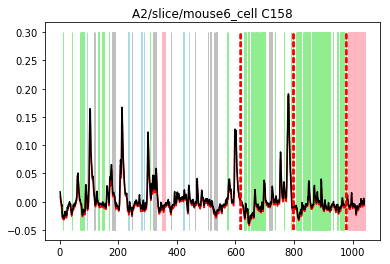

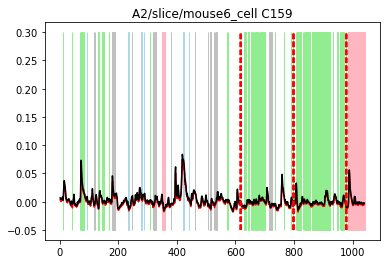

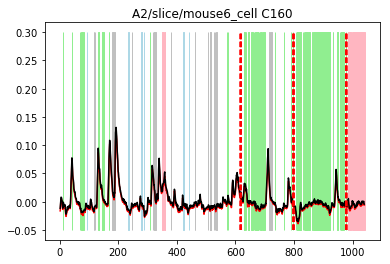

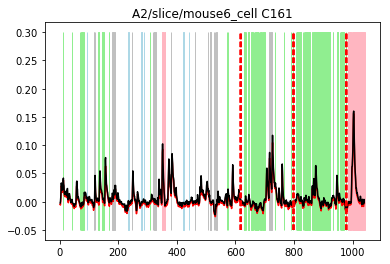

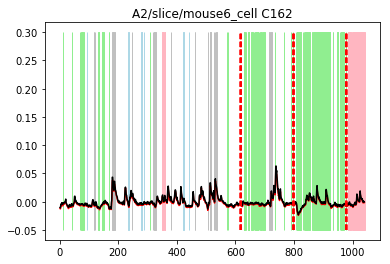

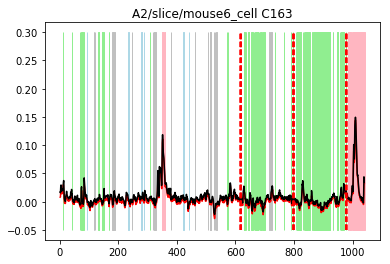

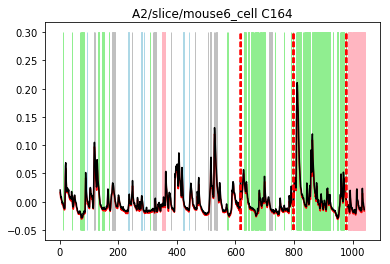

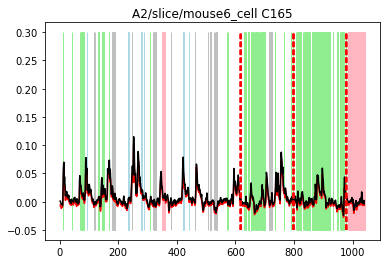

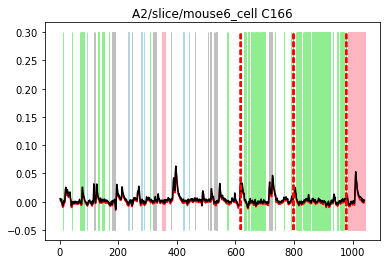

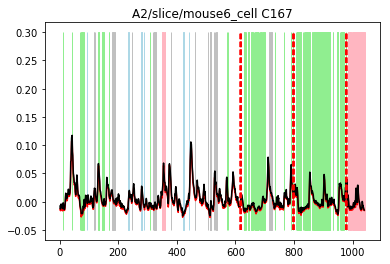

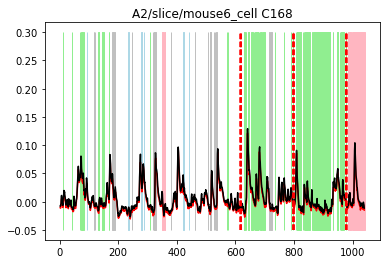

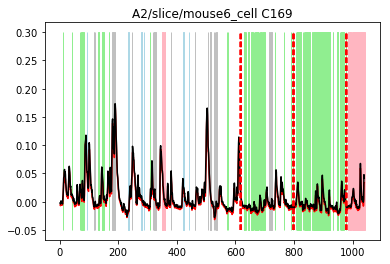

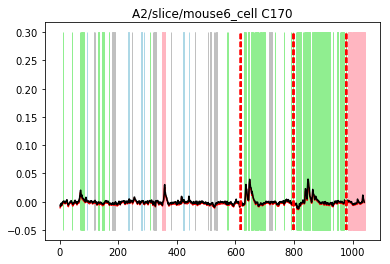

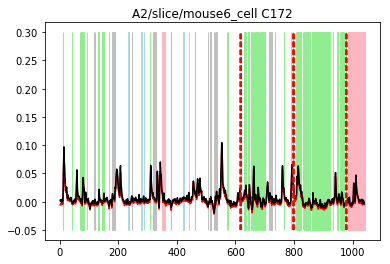

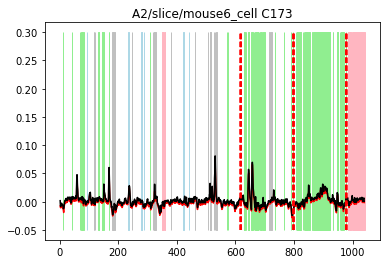

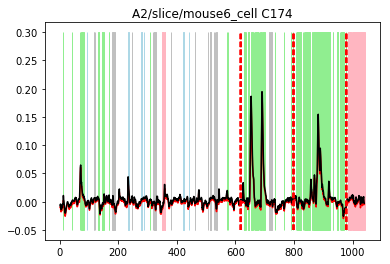

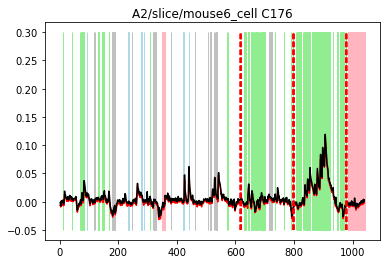

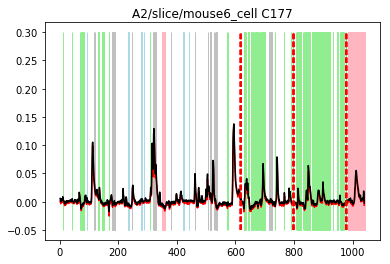

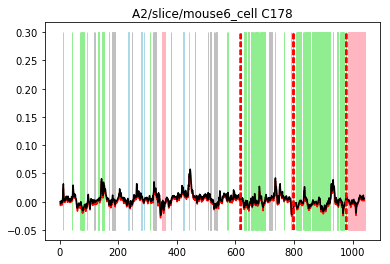

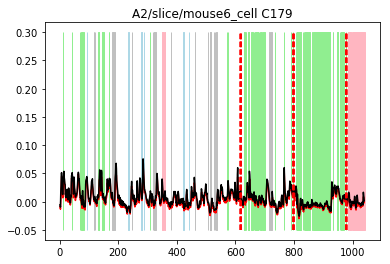

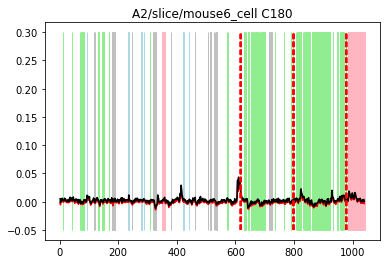

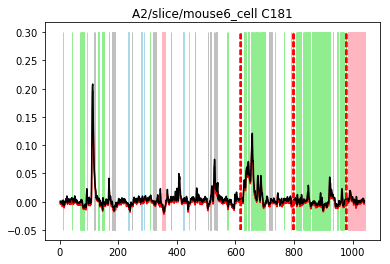

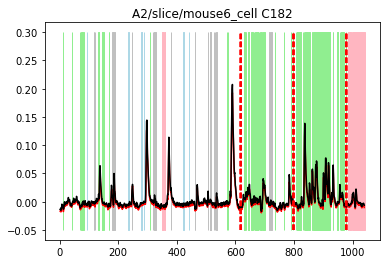

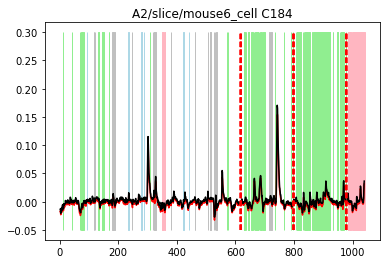

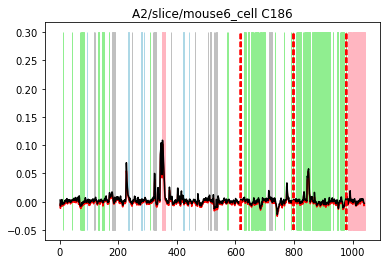

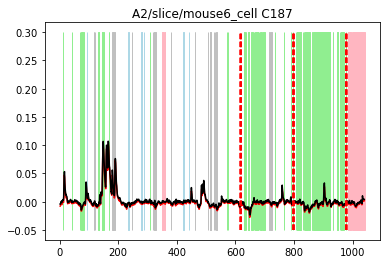

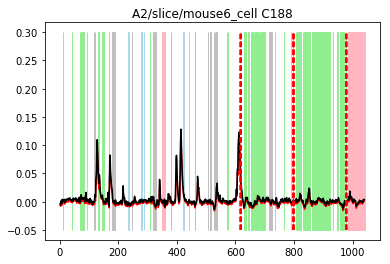

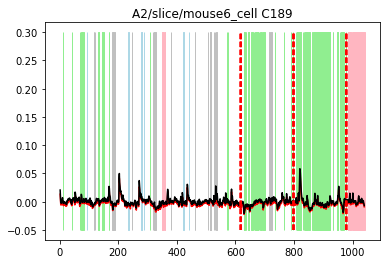

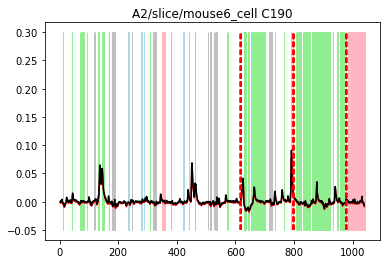

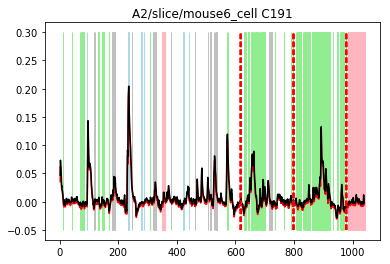

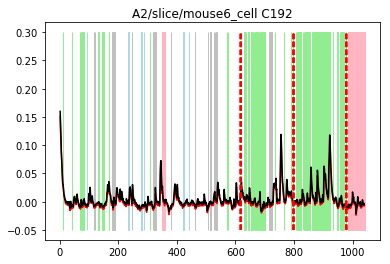

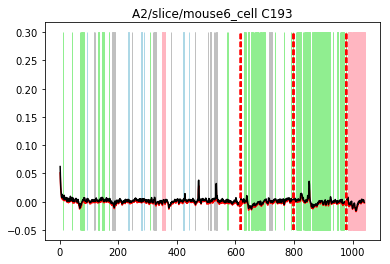

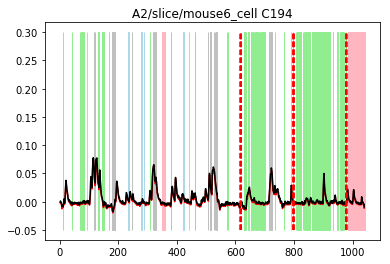

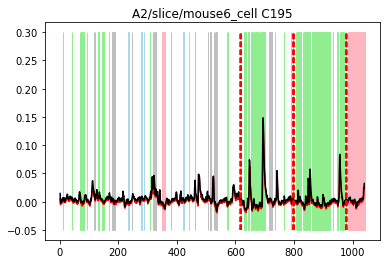

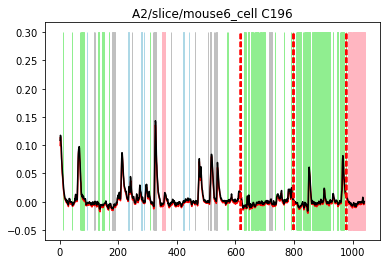

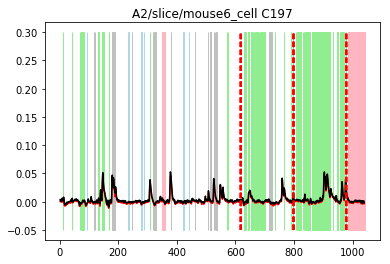

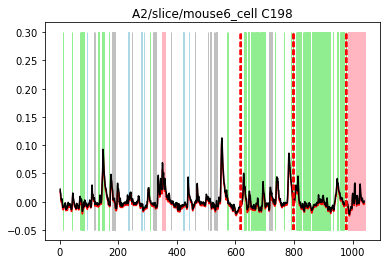

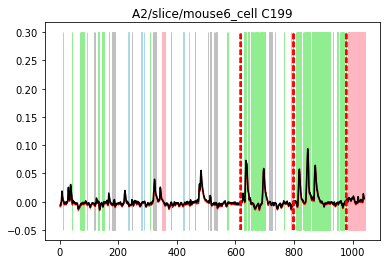

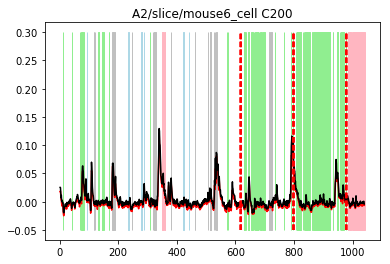

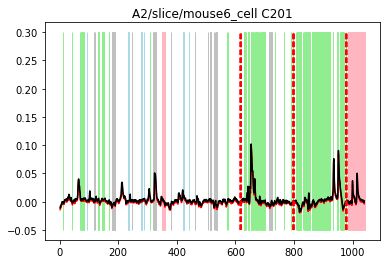

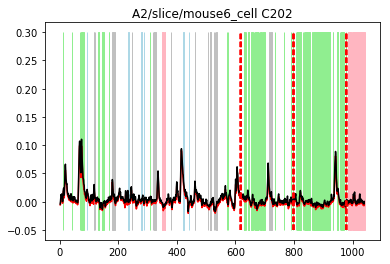

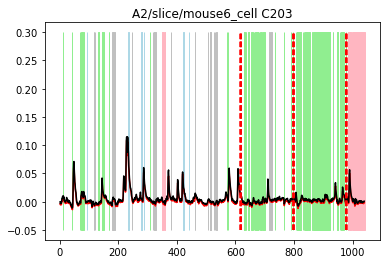

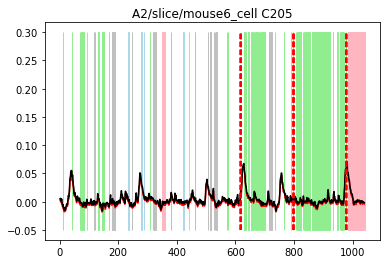

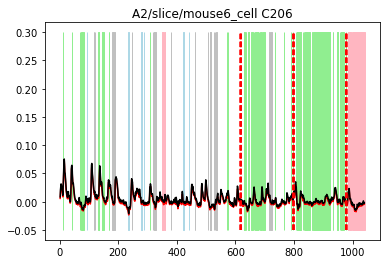

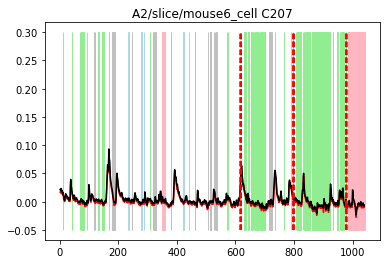

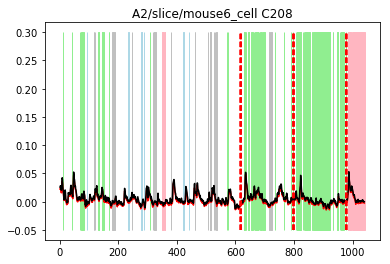

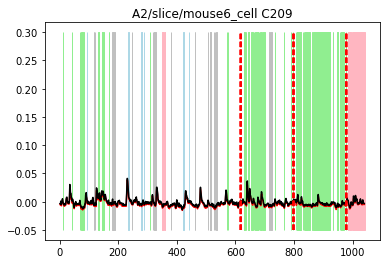

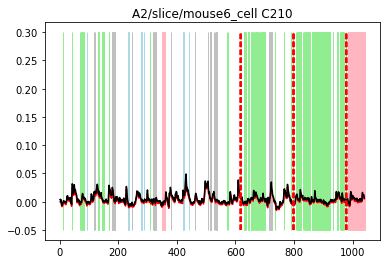

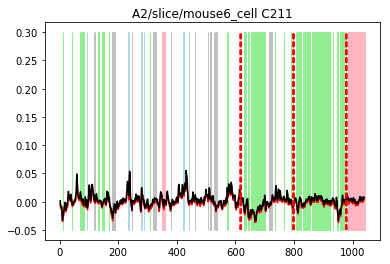

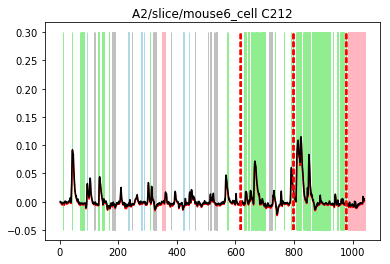

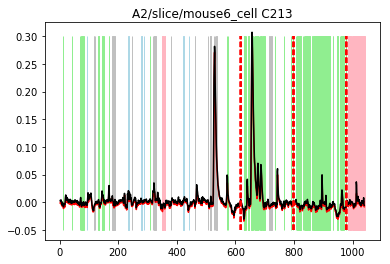

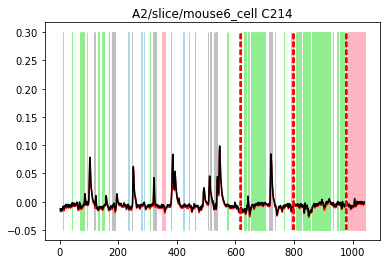

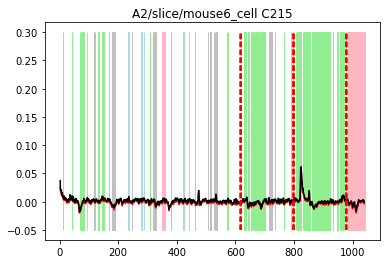

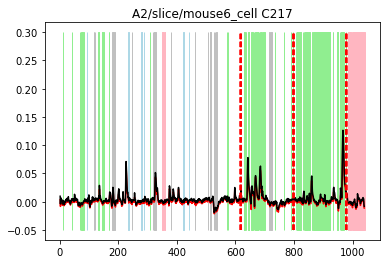

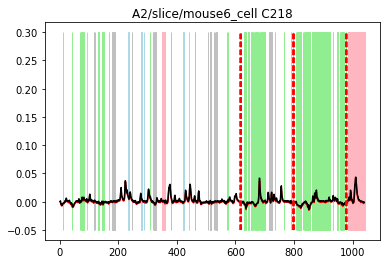

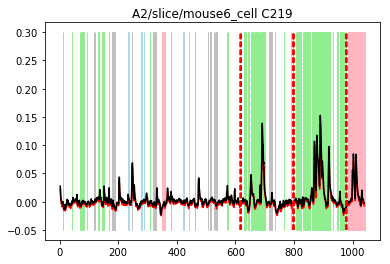

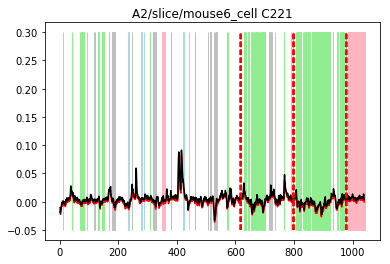

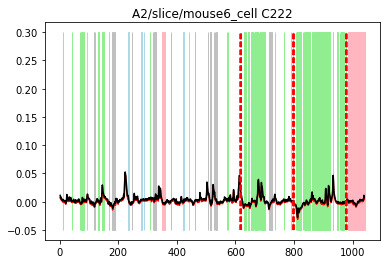

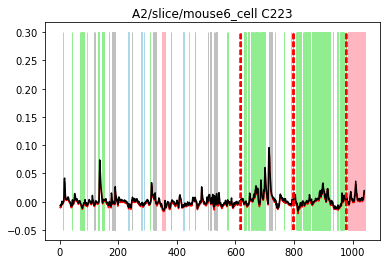

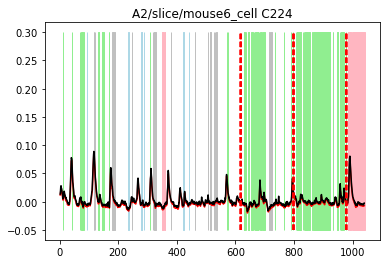

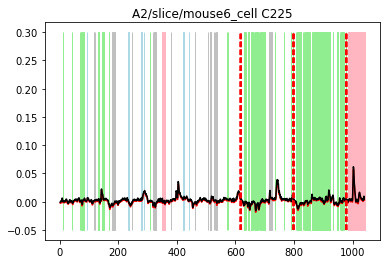

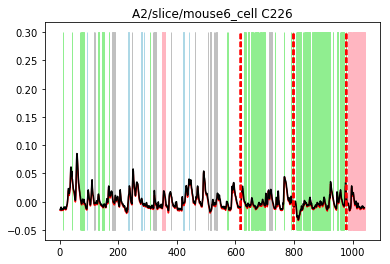

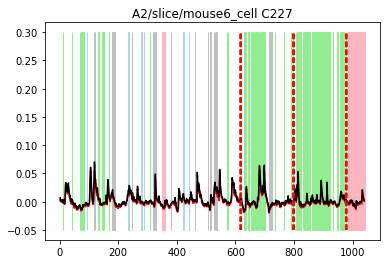

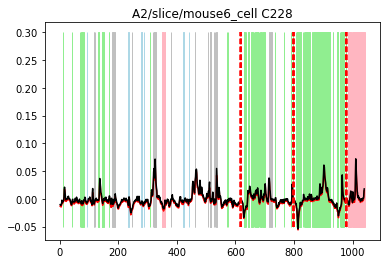

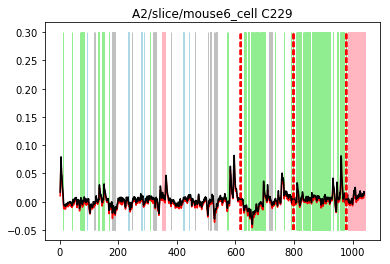

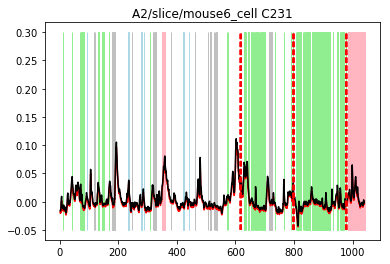

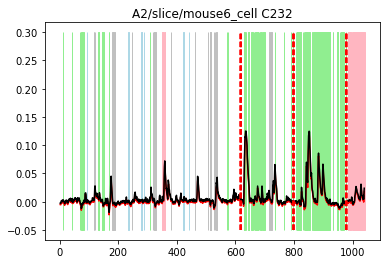

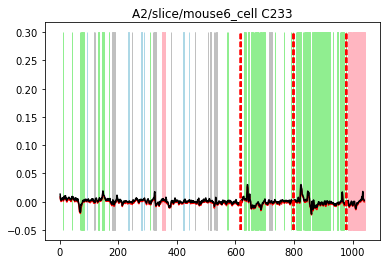

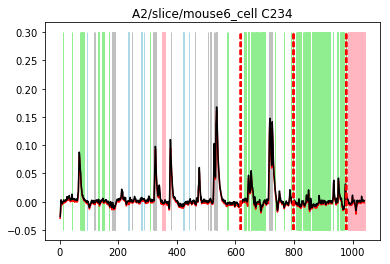

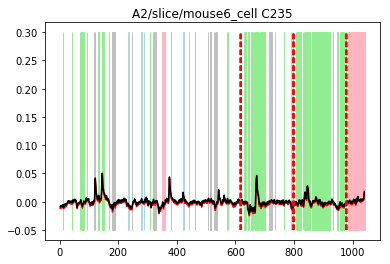

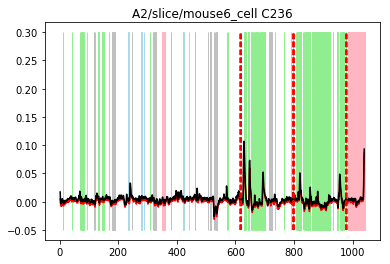

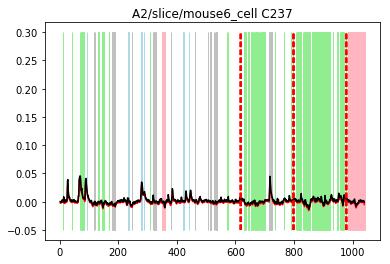

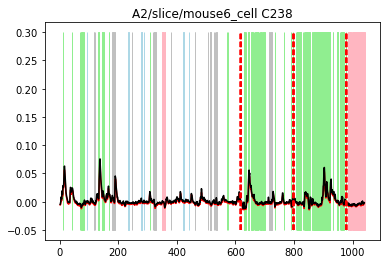

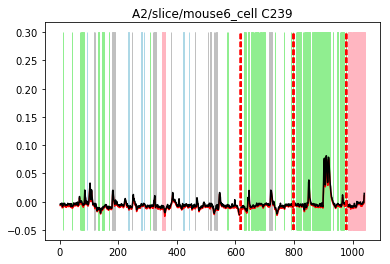

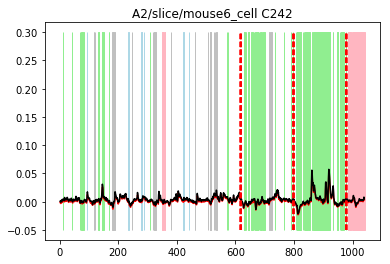

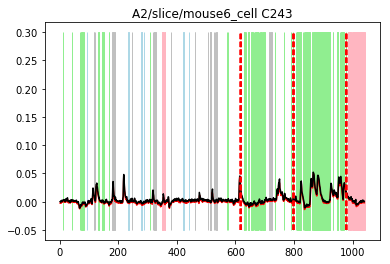

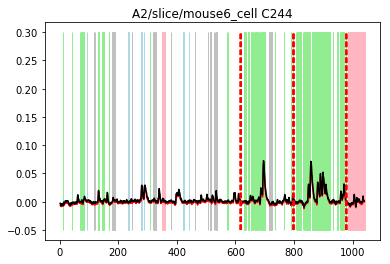

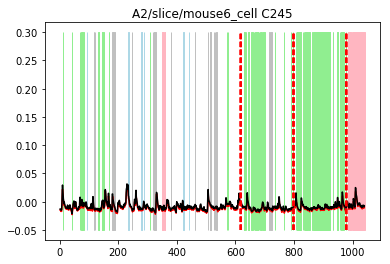

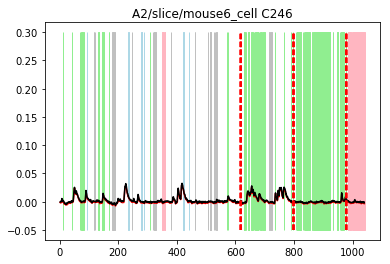

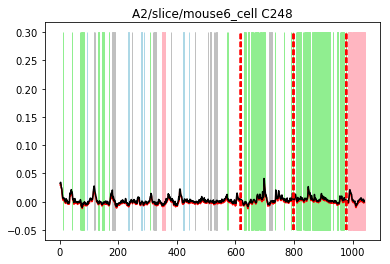

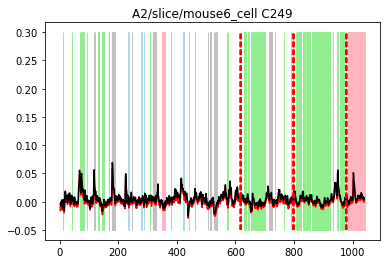

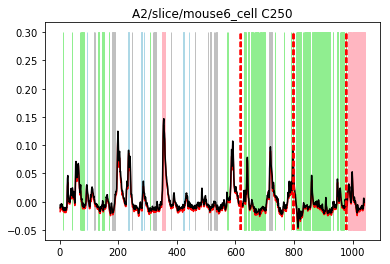

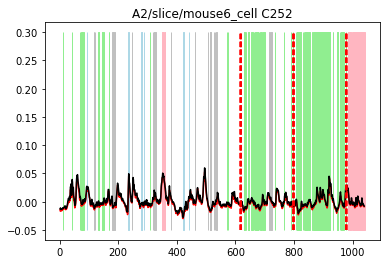

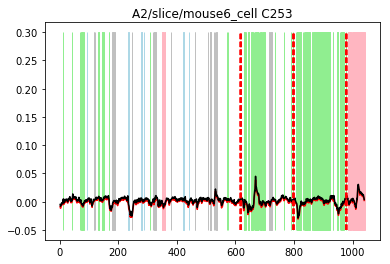

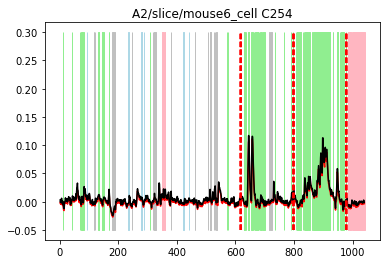

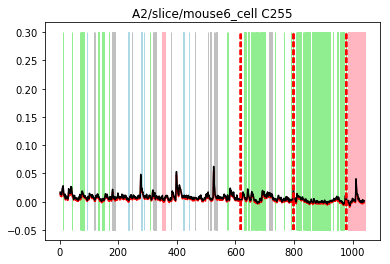

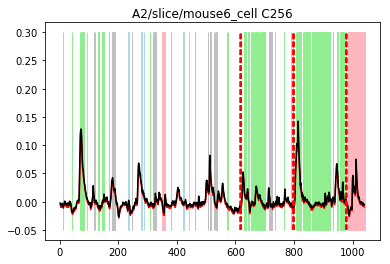

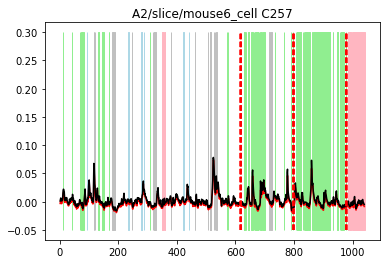

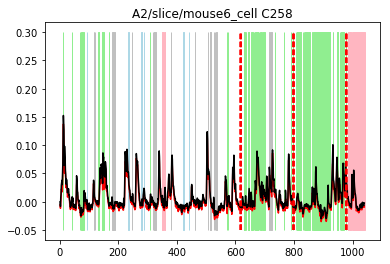

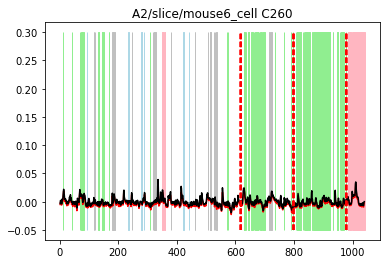

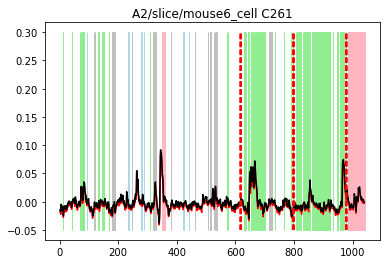

In [41]:
Index=np.arange(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1),1)

df_mean=pd.DataFrame(index=Index,columns=[])

for i in range(0,len(df.columns)):
    
    df_mean[df.columns[i]]=-100

for i_n in range(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1)):
    
    i = i_n - int(df.iloc[0].loc['Slice'])
    
    df_mean.iloc[i].loc['Slice']=i_n
    
    dfs = df[df['Slice']==i_n]
    
    for k in range(0,df.columns.get_loc('Time2')+1):
    
        df_mean.iloc[i,k]=dfs.iloc[0,k]
    
    
    for j in range(dfs.columns.get_loc(' C000'),dfs.columns.get_loc(' C261')+1):
        
        df_mean.iloc[i,j]=dfs[dfs.columns[j]].mean()
        
    for l in range(dfs.columns.get_loc('session'),dfs.columns.get_loc('ses_c3')+1):
        
        df_mean.iloc[i,l]=int(dfs.iloc[0,l])

dfmean=df_mean

Index=np.arange(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1),1)

df_max=pd.DataFrame(index=Index,columns=[])

for i in range(0,len(df.columns)):
    
    df_max[df.columns[i]]=-100
    
for i_n in range(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1)):
    
    i = i_n - int(df.iloc[0].loc['Slice'])
    
    df_max.iloc[i].loc['Slice']=i_n
    
    dfs = df[df['Slice']==i_n]
    
    for k in range(0,df.columns.get_loc('Time2')+1):
    
        df_max.iloc[i,k]=dfs.iloc[0,k]
    
    
    for j in range(dfs.columns.get_loc(' C000'),dfs.columns.get_loc(' C261')+1):
        
        df_max.iloc[i,j]=dfs[dfs.columns[j]].max()
        
    for l in range(dfs.columns.get_loc('session'),dfs.columns.get_loc('ses_c3')+1):
        
        df_max.iloc[i,l]=int(dfs.iloc[0,l])

dfmax=df_max

for j in range(dfmean.columns.get_loc(' C000'),dfmean.columns.get_loc(' C261')+1):

    plt.plot(dfmean['Slice'],dfmean[dfmean.columns[j]],color='red')
    
    plt.plot(dfmax['Slice'],dfmax[dfmax.columns[j]],color='black')

    plt.ylim=(-0.05,0.30)

    for i in range(0,dfmean.shape[0]):
    
        if dfmean.iloc[i].loc['FZ'] == 1:
            
            if dfmean.iloc[i].loc['X']  <= 125:
                
                if dfmean.iloc[i].loc['Y']  <=100:
                    
                    Color='lightpink'
                    
                else:
                    
                    Color='lightblue'
            
            else:
                
                if dfmean.iloc[i].loc['Y']  <=100:
                    
                    Color='silver'
                    
                else:
                    
                    Color='lightgreen'
                
        
            plt.fill([dfmean.iloc[i].loc['Slice'],dfmean.iloc[i].loc['Slice']+1,dfmean.iloc[i].loc['Slice']+1,dfmean.iloc[i].loc['Slice']],[-0.05,-0.05,0.30,0.30],color=Color)
        
        if (dfmean.iloc[i].loc['Shock'] == 1):
            
            plt.plot([dfmean.iloc[i].loc['Slice'],dfmean.iloc[i].loc['Slice']],[-0.05,0.30],color='red',linestyle='dashed')
            
        
    title_name='%s/slice/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
    plt.title(title_name)
    file_name=title_name+'.png'
    #plt.savefig(file_name)
    plt.figure()
    plt.show()